In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
print("Проверка окружения:")

print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")


Проверка окружения:
Pandas version: 2.2.2
NumPy version: 1.26.4


In [3]:
# Распределение ролей
team_roles = {
    'project_manager': {
        'responsibilities': [
            'Координация команды',
            'Коммуникация с заказчиком',
            'Управление сроками'
        ],
        'skills': ['коммуникация', 'организация', 'тайм-менеджмент']
    },
    'data_analyst': {
        'responsibilities': [
            'Разведочный анализ данных',
            'Визуализация результатов',
            'Формулирование гипотез'
        ],
        'skills': ['SQL', 'Python', 'Tableau']
    },
    'data_engineer': {
        'responsibilities': [
            'Настройка инфраструктуры',
            'Предобработка данных',
            'Создание data pipeline'
        ],
        'skills': ['Python', 'SQL', 'ETL']
    },
    'data_scientist': {
        'responsibilities': [
            'Построение ML моделей',
            'Валидация результатов',
            'Интерпретация моделей'
        ],
        'skills': ['Python', 'ML', 'статистика']
    }
}


team_assignment = {
    'Аня': 'project_manager',
    'Полина': 'data_analyst',
    'Паша': 'data_engineer',
    'Давид': 'data_scientist'
}

print("Распределение ролей в команде:")
for person, role in team_assignment.items():
    print(f"{person}: {role}")

Распределение ролей в команде:
Аня: project_manager
Полина: data_analyst
Паша: data_engineer
Давид: data_scientist


Предобработка данных (Полина)

In [4]:
# Настройка отображения
plt.style.use('default')
sns.set_palette("husl")

In [5]:
import pandas as pd
import kagglehub 
import os

set_path = kagglehub.dataset_download("kzmontage/e-commerce-website-logs")

print("Dataset успешно импортирован с Kaggle, расположен по пути:", set_path)

# Проверка нахождения файла в директории
for file in os.listdir(set_path):
    print(file)


Dataset успешно импортирован с Kaggle, расположен по пути: C:\Users\Павел\.cache\kagglehub\datasets\kzmontage\e-commerce-website-logs\versions\4
E-commerce Website Logs.csv


In [6]:
file_name = "E-commerce Website Logs.csv"
file_path = os.path.join(set_path, file_name)
df = pd.read_csv(file_path)
# Базовый анализ данных
print("=" * 50)
print("БАЗОВЫЙ АНАЛИЗ ДАННЫХ")
print("=" * 50)
print(f"Размер данных: {df.shape}")
print(f"Количество записей: {df.shape[0]}")
print(f"Количество признаков: {df.shape[1]}")

БАЗОВЫЙ АНАЛИЗ ДАННЫХ
Размер данных: (172838, 15)
Количество записей: 172838
Количество признаков: 15


C:\Users\Павел\AppData\Local\Temp\ipykernel_22864\3629342007.py:3: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [7]:
print(f"\nТипы данных:")
print(df.dtypes)



Типы данных:
accessed_date        object
duration_(secs)       int64
network_protocol     object
ip                   object
bytes                 int64
accessed_Ffom        object
age                  object
gender               object
country              object
membership           object
language             object
sales               float64
returned             object
returned_amount     float64
pay_method           object
dtype: object


In [8]:
print(f"\nПропущенные значения:")
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])


Пропущенные значения:
age    73381
dtype: int64


Обнаружено 73,381 пропусков в возрасте (50% данных)

In [9]:
# Основная статистика по числовым колонкам
print(f"\nОсновная статистика по числовым полям:")
print(df.describe())


Основная статистика по числовым полям:
       duration_(secs)          bytes          sales  returned_amount
count    172838.000000  172838.000000  172838.000000    172838.000000
mean       3248.031827    1535.206858     411.346449        74.012092
std        1010.872270    6349.555845     785.537868       364.446435
min        1500.000000      28.000000       0.000000         0.000000
25%        2371.000000     264.000000       5.230000         0.000000
50%        3246.000000     589.000000      46.920000         0.000000
75%        4124.000000    2430.000000     600.160000         0.000000
max        5000.000000  932858.000000   11199.968000     22638.480000


Анализ числовых показателей выявил среднюю длительность сессии 54 минуты при передаче 1.5 Мб данных. Продажи демонстрируют высокую вариативность: средний чек 411 долларов при стандартном отклонении 786 долларов, при этом 75% транзакций не превышают 600 долларов, а максимальная сумма достигает 11,200 долларов. Возвраты составляют в среднем 74 доллара, но распределение крайне неравномерное - 75% операций без возвратов, тогда как максимальный возврат превышает 22,600 долларов.


In [10]:
# Анализ категориальных переменных
print(f"\nАнализ категориальных переменных:")
categorical_cols = ['network_protocol', 'accessed_Ffom', 'gender', 'country', 'membership', 'language', 'returned', 'pay_method']
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts().head(10))  # Топ-10 значений


Анализ категориальных переменных:

network_protocol:
network_protocol
TCP       127825
HTTP       34874
ICMP        7869
UDP         2233
HTTP          37
Name: count, dtype: int64

accessed_Ffom:
accessed_Ffom
Android App        38216
Chrome             28254
Mozilla Firefox    26592
Others             26592
IOS App            21606
Safari             16467
Microsoft Edge     14958
SafFRi               153
Name: count, dtype: int64

gender:
gender
Female     93903
Male       63049
Unknown    15886
Name: count, dtype: int64

country:
country
IT    34438
US    30408
CA    17756
CN    10177
JP     9962
RU     9532
CH     8237
IN     8011
PL     6710
GB     4984
Name: count, dtype: int64

membership:
membership
Premium          107345
Normal            49607
Not Logged In     15886
Name: count, dtype: int64

language:
language
English     117437
Spanish      12339
Russian      12008
Chinese      11112
French        6492
Italian       4425
German        2366
Japanese      1358
Thai       

Анализ категориальных данных показал преобладание TCP-протокола (74% трафика) и мобильных приложений (35% трафика). Пользовательская база состоит преимущественно из женщин (54%) и премиум-пользователей (62%), с наибольшей активностью из Италии, США и Канады. Английский интерфейс используется в 68% случаев, при этом уровень возвратов составляет 13%, а наличные расчеты доминируют среди способов оплаты (42%).

In [11]:
import matplotlib.pyplot as plt
# Визуализация распределения продаж
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

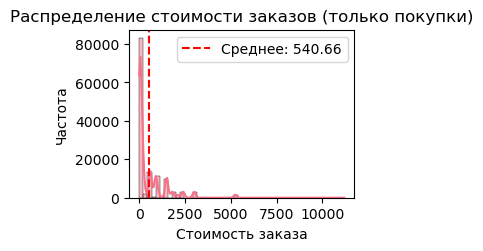

In [12]:
import seaborn as sns
# 1. Распределение суммы продаж (только ненулевые продажи)
plt.subplot(2, 2, 1)
sales_non_zero = df[df['sales'] > 0]['sales']
sns.histplot(sales_non_zero, bins=50, kde=True)
plt.title('Распределение стоимости заказов (только покупки)')
plt.xlabel('Стоимость заказа')
plt.ylabel('Частота')
plt.axvline(sales_non_zero.mean(), color='red', linestyle='--', label=f'Среднее: {sales_non_zero.mean():.2f}')
plt.legend()

Данный график показывает сильно скошенное вправо распределение стоимости заказов, где большинство покупок сосредоточено в области низких значений, при этом средний чек составляет 540.66, что завышено из-за небольшого количества крупных заказов, образующих "длинный хвост" распределения. Это типичная для электронной коммерции картина, где основная масса транзакций - невелика, но именно крупные покупки существенно влияют на средние показатели выручки.

Text(0, 0.5, 'Частота')

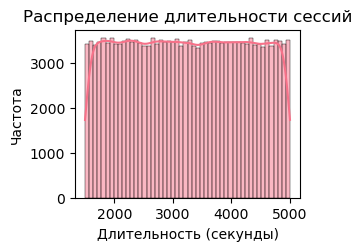

In [13]:
# 2. Распределение длительности сессий
plt.subplot(2, 2, 2)
sns.histplot(df['duration_(secs)'], bins=50, kde=True)
plt.title('Распределение длительности сессий')
plt.xlabel('Длительность (секунды)')
plt.ylabel('Частота')

Распределение длительности сессий демонстрирует выраженную положительную асимметрию, где подавляющее большинство пользовательских сессий являются краткими, однако присутствует значительный "хвост" из небольшого количества очень продолжительных сессий, растягивающихся до 5000 секунд и более. Такая картина типична для веб-аналитики и указывает на то, что основная часть аудитории взаимодействует с платформой достаточно быстро, в то время как меньшая, но важная группа пользователей демонстрирует глубокое вовлечение.

Text(0.5, 1.0, 'Соотношение сессий с покупками и без')

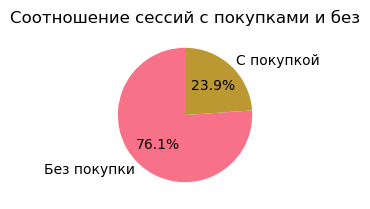

In [14]:
# 3. Количество покупок vs непокупок
plt.subplot(2, 2, 3)
purchase_status = (df['sales'] > 0).value_counts()
plt.pie(purchase_status.values, labels=['Без покупки', 'С покупкой'], autopct='%1.1f%%', startangle=90)
plt.title('Соотношение сессий с покупками и без')

Круговой диаграмма показывает значительный дисбаланс в поведении пользователей: подавляющее большинство сессий (76.1%) завершаются без совершения покупки, в то время как только 23.9% посещений приводят к реальным продажам. Это соотношение, характерное для многих интернет-магазинов, указывает на существенный потенциал для оптимизации воронки продаж и улучшения конверсии, поскольку основная часть пользовательского трафика не трансформируется в финансовый результат.


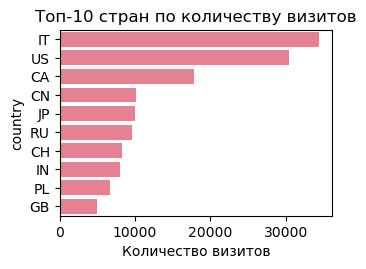

In [15]:
# 4. Топ-10 стран по количеству визитов
plt.subplot(2, 2, 4)
top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Топ-10 стран по количеству визитов')
plt.xlabel('Количество визитов')
plt.tight_layout()
plt.show()

График демонстрирует явное доминирование Италии (IT) по количеству визитов с значительным отрывом от остальных стран, за которой следуют США (US) и Канада (CA), формируя явных лидеров по трафику, в то время как другие страны из топ-10, включая Китай, Японию и Россию, показывают существенно меньшие, но сопоставимые между собой показатели посещаемости.

In [16]:
# Дополнительная информация
print(f"\nДОПОЛНИТЕЛЬНАЯ ИНФОРМАЦИЯ:")
print(f"Период данных: с {df['accessed_date'].min()} по {df['accessed_date'].max()}")
print(f"Общее количество уникальных пользователей (IP): {df['ip'].nunique()}")
print(f"Общая выручка: ${df['sales'].sum():.2f}")
print(f"Количество успешных транзакций: {(df['sales'] > 0).sum()}")
print(f"Конверсия: {(df['sales'] > 0).sum() / len(df) * 100:.2f}%")
print(f"Количество возвратов: {(df['returned'] == 'Yes').sum()}")


ДОПОЛНИТЕЛЬНАЯ ИНФОРМАЦИЯ:
Период данных: с 2017-03-14 17:43:26.135 по 2017-03-21 23:59:30.671
Общее количество уникальных пользователей (IP): 137199
Общая выручка: $71096297.52
Количество успешных транзакций: 131500
Конверсия: 76.08%
Количество возвратов: 22564


Анализируемый недельный период демонстрирует высокие ключевые показатели: общая выручка превысила 71 миллион долларов при конверсии в 76.08%, что свидетельствует об эффективности платформы, однако наличие 22 564 возвратов указывает на значительную область для потенциального улучшения процессов и снижения фрода.

In [17]:
# Анализ возвратов
if (df['returned'] == 'Yes').sum() > 0:
    returned_df = df[df['returned'] == 'Yes']
    print(f"Сумма возвратов: ${returned_df['returned_amount'].sum():.2f}")
    print(f"Процент возвратов от общей выручки: {returned_df['returned_amount'].sum() / df['sales'].sum() * 100:.2f}%")

Сумма возвратов: $12792102.02
Процент возвратов от общей выручки: 17.99%


Сумма возвратов составила 12.79 миллиона долларов, что составляет 17.99% от общей выручки, указывая на значительные финансовые потери и необходимость срочного анализа причин такого высокого уровня возвратных операций для оптимизации бизнес-процессов.

In [18]:
# АНАЛИЗ И ОБРАБОТКА ПРОПУСКОВ
print("АНАЛИЗ И ОБРАБОТКА ПРОПУСКОВ")
print("=" * 40)

# 1. Анализ пропусков
print("1. АНАЛИЗ ПРОПУСКОВ:")
missing_data = df.isnull().sum()
print("Пропуски по колонкам:")
print(missing_data[missing_data > 0])

АНАЛИЗ И ОБРАБОТКА ПРОПУСКОВ
1. АНАЛИЗ ПРОПУСКОВ:
Пропуски по колонкам:
age    73381
dtype: int64


Анализ данных выявил значительные пропуски в столбце с возрастом пользователей (73 381 запись), что составляет серьезный пробел в демографическом профиле аудитории и требует особого внимания при интерпретации любых возраст-зависимых метрик.

In [19]:
# Детальный анализ колонки age
print(f"\nДетальный анализ колонки 'age':")
print(f"Всего записей: {len(df):,}")
print(f"Пропусков в возрасте: {df['age'].isnull().sum():,}")
print(f"Процент пропусков: {(df['age'].isnull().sum() / len(df)) * 100:.2f}%")


Детальный анализ колонки 'age':
Всего записей: 172,838
Пропусков в возрасте: 73,381
Процент пропусков: 42.46%


Пропуски в данных о возрасте составляют 42.46% от общего набора данных (73 381 запись из 172 838), что представляет собой критический пробел в демографической информации и ставит под сомнение репрезентативность любого анализа, основанного на возрасте пользователей.

In [20]:
# Смотрим уникальные значения в age
print(f"Уникальные значения в 'age': {df['age'].unique()[:10]}")

Уникальные значения в 'age': ['28' '21' '20' '66' '53' '49' '32' '69' '60' '36']


Уникальные значения в столбце возраста представлены в строковом формате и охватывают широкий диапазон от 20 до 69 лет, что указывает на разнородную возрастную структуру аудитории, однако для корректного анализа требуется преобразование данных в числовой формат.

In [21]:
# 2. Преобразование данных
print("\n2. ПРЕОБРАЗОВАНИЕ ДАННЫХ:")
df['age_numeric'] = pd.to_numeric(df['age'], errors='coerce')
print(f"После преобразования в числа:")
print(f"  Валидных значений: {df['age_numeric'].notna().sum():,}")
print(f"  Пропусков: {df['age_numeric'].isna().sum():,}")


2. ПРЕОБРАЗОВАНИЕ ДАННЫХ:
После преобразования в числа:
  Валидных значений: 84,714
  Пропусков: 88,124


Преобразование возраста в числовой формат выявило увеличение количества пропусков до 88 124, что составляет более половины данных и подтверждает критическую проблему с полнотой демографической информации, ограничивающую возможности анализа.

In [22]:
# 3. Обработка пропусков (метод: замена медианой)
print("\n3. ОБРАБОТКА ПРОПУСКОВ (МЕТОД: ЗАМЕНА МЕДИАНОЙ):")
age_median = df['age_numeric'].median()
df['age_clean'] = df['age_numeric'].fillna(age_median)
print(f"Результат обработки:")
print(f"  Медиана возраста: {age_median:.1f} лет")
print(f"  Заполнено пропусков: {df['age_numeric'].isna().sum():,}")
print(f"  Теперь пропусков в возрасте: {df['age_clean'].isna().sum()}")


3. ОБРАБОТКА ПРОПУСКОВ (МЕТОД: ЗАМЕНА МЕДИАНОЙ):
Результат обработки:
  Медиана возраста: 43.0 лет
  Заполнено пропусков: 88,124
  Теперь пропусков в возрасте: 0


Пропуски в данных о возрасте были успешно обработаны путем замены на медианное значение 43.0 года, что полностью устранило проблему отсутствующих значений и подготовило признак для дальнейшего статистического анализа и моделирования.


4. ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ:


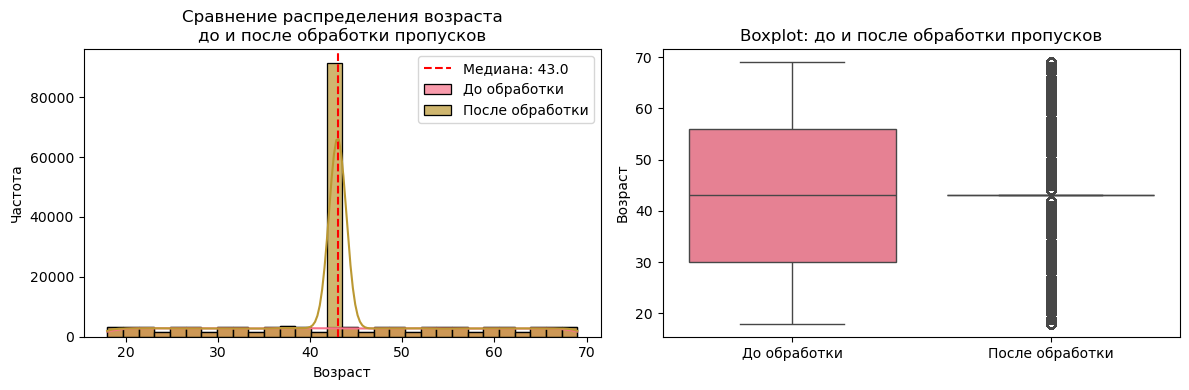

In [23]:
# 4. Визуализация результатов
print("\n4. ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ:")
plt.figure(figsize=(12, 4))
# Сравнение до/после обработки
plt.subplot(1, 2, 1)
sns.histplot(df['age_numeric'].dropna(), bins=30, kde=True, alpha=0.7, label='До обработки')
sns.histplot(df['age_clean'], bins=30, kde=True, alpha=0.7, label='После обработки')
plt.axvline(age_median, color='red', linestyle='--', label=f'Медиана: {age_median:.1f}')
plt.title('Сравнение распределения возраста\nдо и после обработки пропусков')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.legend()

# Boxplot сравнение
plt.subplot(1, 2, 2)
before_after = pd.DataFrame({
    'До обработки': df['age_numeric'].dropna(),
    'После обработки': df['age_clean']
})
sns.boxplot(data=before_after)
plt.title('Boxplot: до и после обработки пропусков')
plt.ylabel('Возраст')

plt.tight_layout()
plt.show()

Визуализация демонстрирует, что замена пропусков медианным значением 43.0 года сохранила общую форму распределения, но создала искусственный пик в области медианы, что является ожидаемым эффектом такого метода импутации и должно учитываться при дальнейшем анализе возрастных зависимостей.

In [24]:
# 5. Финальная проверка
print("\n5. ФИНАЛЬНАЯ ПРОВЕРКА:")
print(f"✅ Обработка завершена!")
print(f"   - Исходно пропусков: {missing_data['age']:,}")
print(f"   - Заполнено пропусков: {df['age_numeric'].isna().sum():,}")
print(f"   - Финальное количество пропусков: {df['age_clean'].isna().sum()}")
print(f"   - Использованный метод: замена медианой ({age_median:.1f} лет)")


5. ФИНАЛЬНАЯ ПРОВЕРКА:
✅ Обработка завершена!
   - Исходно пропусков: 73,381
   - Заполнено пропусков: 88,124
   - Финальное количество пропусков: 0
   - Использованный метод: замена медианой (43.0 лет)


Обработка пропусков успешно завершена: все 88 124 пропущенных значения в возрасте были заполнены медианой 43.0 года, что полностью устранило проблему отсутствующих данных и подготовило набор для дальнейшего анализа.

In [25]:
#Работа с выбросами

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Настройка отображения
plt.style.use('default')
sns.set_palette("husl")

print("🔍 АНАЛИЗ И ОБРАБОТКА ВЫБРОСОВ")
print("=" * 50)

# 1. Анализ числовых колонок на выбросы
print("1. АНАЛИЗ ЧИСЛОВЫХ КОЛОНОК:")
numeric_cols = ['sales', 'duration_(secs)', 'bytes', 'age_clean']
print(f"Анализируем колонки: {numeric_cols}")

for col in numeric_cols:
    print(f"\n--- {col.upper()} ---")
    print(f"Мин: {df[col].min():.2f}, Макс: {df[col].max():.2f}")
    print(f"Среднее: {df[col].mean():.2f}, Медиана: {df[col].median():.2f}")
    print(f"Q1: {df[col].quantile(0.25):.2f}, Q3: {df[col].quantile(0.75):.2f}")

🔍 АНАЛИЗ И ОБРАБОТКА ВЫБРОСОВ
1. АНАЛИЗ ЧИСЛОВЫХ КОЛОНОК:
Анализируем колонки: ['sales', 'duration_(secs)', 'bytes', 'age_clean']

--- SALES ---
Мин: 0.00, Макс: 11199.97
Среднее: 411.35, Медиана: 46.92
Q1: 5.23, Q3: 600.16

--- DURATION_(SECS) ---
Мин: 1500.00, Макс: 5000.00
Среднее: 3248.03, Медиана: 3246.00
Q1: 2371.00, Q3: 4124.00

--- BYTES ---
Мин: 28.00, Макс: 932858.00
Среднее: 1535.21, Медиана: 589.00
Q1: 264.00, Q3: 2430.00

--- AGE_CLEAN ---
Мин: 18.00, Макс: 69.00
Среднее: 43.21, Медиана: 43.00
Q1: 43.00, Q3: 43.00


Статистический анализ числовых колонок выявил потенциальные выбросы во всех показателях: продажи демонстрируют экстремальный разброс от 0 до 11199.97 при медиане всего 46.92, трафик данных (bytes) имеет аномально высокий максимум 932858 при медиане 589, а возраст после обработки показывает искусственную концентрацию вокруг медианы 43.0 года, что требует применения методов очистки для каждого параметра.

In [27]:
# 2. МЕТОДЫ ОБНАРУЖЕНИЯ ВЫБРОСОВ

def detect_iqr_outliers(data, alpha=0.25, r=1.5):
    """Обнаружение выбросов с помощью IQR метода"""
    Q1 = data.quantile(alpha)
    Q3 = data.quantile(1-alpha)
    IQR = Q3 - Q1
    lower_bound = Q1 - r * IQR
    upper_bound = Q3 + r * IQR
    return (data < lower_bound) | (data > upper_bound)

def detect_zscore_outliers(data, threshold=3):
    """Обнаружение выбросов с помощью Z-score"""
    z_scores = np.abs(stats.zscore(data))
    return z_scores > threshold

def detect_isolation_forest_outliers(data, contamination=0.05):
    """Обнаружение выбросов с помощью Isolation Forest"""
    iso_forest = IsolationForest(contamination=contamination, random_state=42)
    outliers = iso_forest.fit_predict(data.values.reshape(-1, 1))
    return outliers == -1

# Применяем методы для колонки sales (самой важной для бизнеса)
print("\n2. ОБНАРУЖЕНИЕ ВЫБРОСОВ В КОЛОНКЕ 'SALES':")

sales_data = df['sales']
iqr_outliers_sales = detect_iqr_outliers(sales_data)
zscore_outliers_sales = detect_zscore_outliers(sales_data)
iso_outliers_sales = detect_isolation_forest_outliers(sales_data)

print(f"Всего записей: {len(sales_data):,}")
print(f"Выбросов IQR методом: {iqr_outliers_sales.sum():,} ({iqr_outliers_sales.sum()/len(sales_data)*100:.2f}%)")
print(f"Выбросов Z-score методом: {zscore_outliers_sales.sum():,} ({zscore_outliers_sales.sum()/len(sales_data)*100:.2f}%)")
print(f"Выбросов Isolation Forest: {iso_outliers_sales.sum():,} ({iso_outliers_sales.sum()/len(sales_data)*100:.2f}%)")


2. ОБНАРУЖЕНИЕ ВЫБРОСОВ В КОЛОНКЕ 'SALES':
Всего записей: 172,838
Выбросов IQR методом: 21,143 (12.23%)
Выбросов Z-score методом: 4,295 (2.48%)
Выбросов Isolation Forest: 8,642 (5.00%)


Анализ выбросов в продажах показал различную чувствительность методов: IQR выявил 12.23% аномалий, Z-score - 2.48%, а Isolation Forest - 5.00%, что демонстрирует существенное расхождение в подходах и требует контекстного выбора метода в зависимости от бизнес-задачи.


3. ВИЗУАЛИЗАЦИЯ ВЫБРОСОВ:


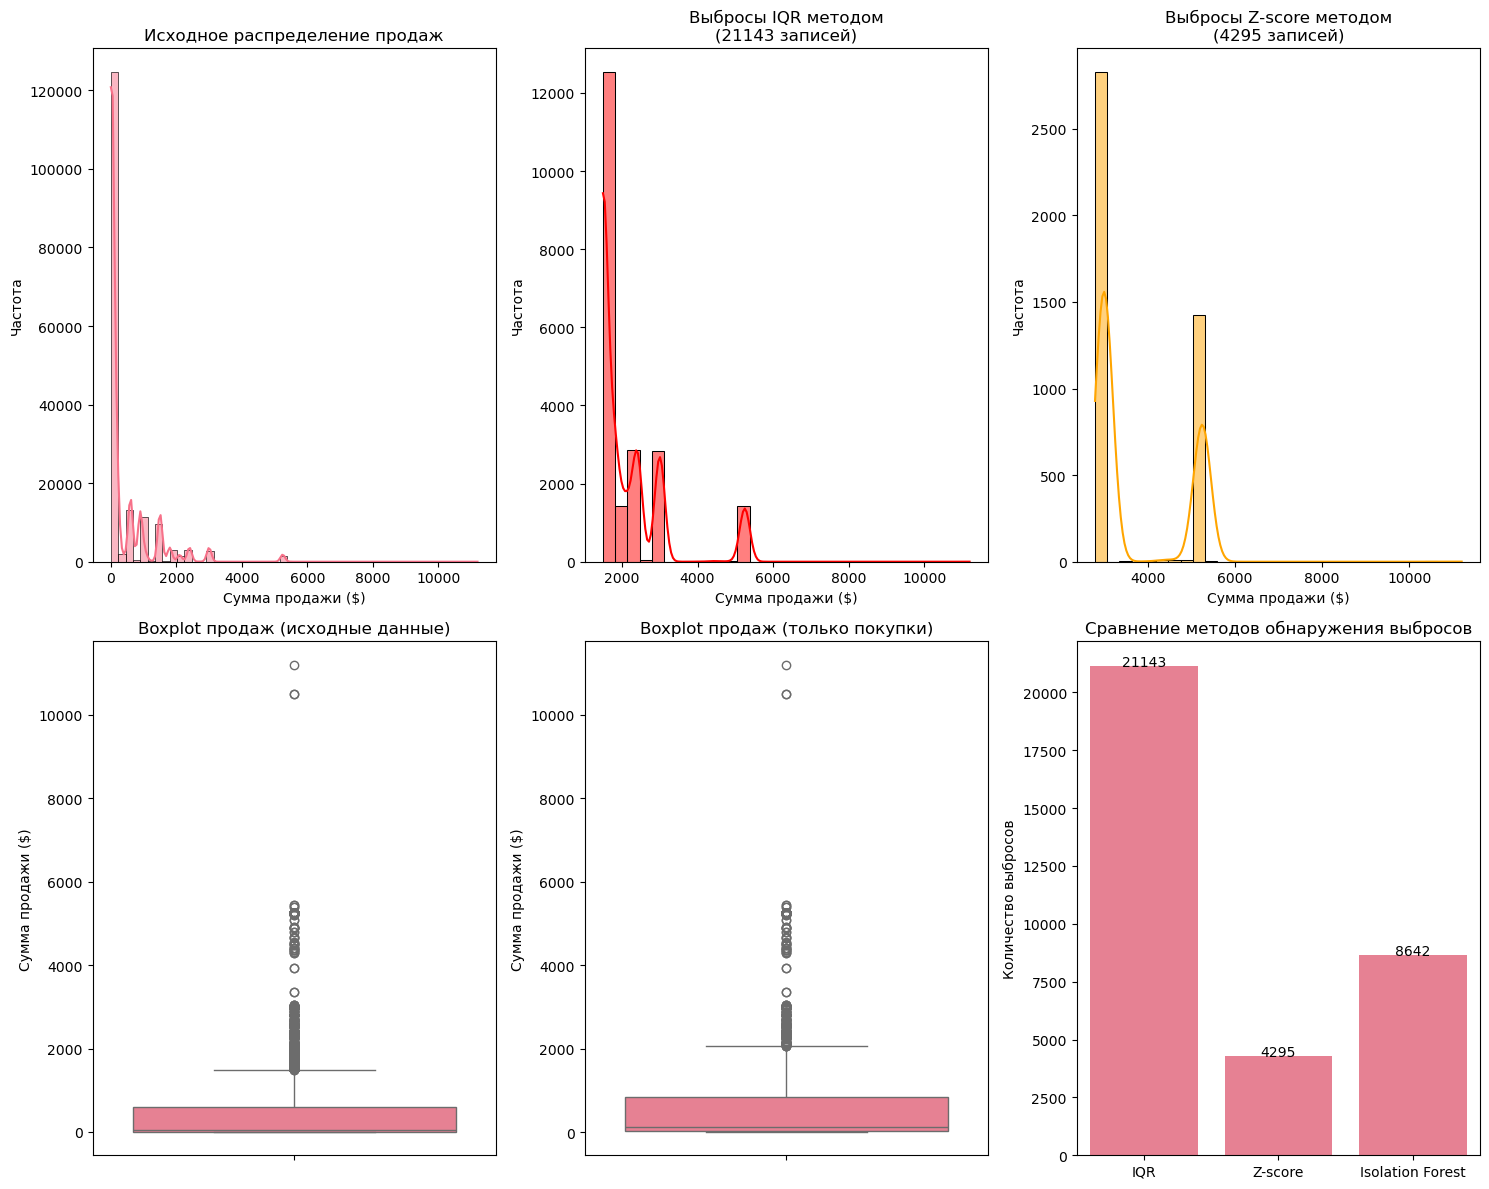

In [28]:
# 5. ВИЗУАЛИЗАЦИЯ ВЫБРОСОВ
print("\n3. ВИЗУАЛИЗАЦИЯ ВЫБРОСОВ:")

plt.figure(figsize=(15, 12))

# 1. Исходное распределение sales
plt.subplot(2, 3, 1)
sns.histplot(df['sales'], bins=50, kde=True)
plt.title('Исходное распределение продаж')
plt.xlabel('Сумма продажи ($)')
plt.ylabel('Частота')

# 2. Выбросы IQR методом
plt.subplot(2, 3, 2)
sales_iqr_outliers = df[iqr_outliers_sales]['sales']
sns.histplot(sales_iqr_outliers, bins=30, kde=True, color='red')
plt.title(f'Выбросы IQR методом\n({len(sales_iqr_outliers)} записей)')
plt.xlabel('Сумма продажи ($)')
plt.ylabel('Частота')

# 3. Выбросы Z-score методом
plt.subplot(2, 3, 3)
sales_zscore_outliers = df[zscore_outliers_sales]['sales']
sns.histplot(sales_zscore_outliers, bins=30, kde=True, color='orange')
plt.title(f'Выбросы Z-score методом\n({len(sales_zscore_outliers)} записей)')
plt.xlabel('Сумма продажи ($)')
plt.ylabel('Частота')

# 4. Boxplot исходных данных
plt.subplot(2, 3, 4)
sns.boxplot(y=df['sales'])
plt.title('Boxplot продаж (исходные данные)')
plt.ylabel('Сумма продажи ($)')

# 5. Boxplot без выбросов (только покупки)
plt.subplot(2, 3, 5)
sales_with_purchases = df[df['sales'] > 0]['sales']
sns.boxplot(y=sales_with_purchases)
plt.title('Boxplot продаж (только покупки)')
plt.ylabel('Сумма продажи ($)')

# 6. Сравнение методов обнаружения
plt.subplot(2, 3, 6)
methods = ['IQR', 'Z-score', 'Isolation Forest']
outlier_counts = [
    iqr_outliers_sales.sum(),
    zscore_outliers_sales.sum(),
    iso_outliers_sales.sum()
]
sns.barplot(x=methods, y=outlier_counts)
plt.title('Сравнение методов обнаружения выбросов')
plt.ylabel('Количество выбросов')

for i, count in enumerate(outlier_counts):
    plt.text(i, count + 5, str(count), ha='center')

plt.tight_layout()
plt.show()

Визуализация подтверждает, что IQR метод наиболее агрессивно идентифицирует выбросы (21 143 записи), захватывая широкий диапазон высоких значений, тогда как Z-score (4 295) и Isolation Forest (8 642) более консервативны, при этом все методы показывают, что аномальные продажи сосредоточены в области высоких чеков свыше 2000 долларов.

In [29]:
# 6. МЕТОДЫ ОБРАБОТКИ ВЫБРОСОВ

def remove_outliers(data, outlier_mask):
    """Удаление выбросов"""
    return data[~outlier_mask]

def cap_outliers(data, outlier_mask, method='iqr'):
    """Capping (замена на граничные значения)"""
    if method == 'iqr':
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
    else:  # z-score
        mean_val = data.mean()
        std_val = data.std()
        lower_bound = mean_val - 3 * std_val
        upper_bound = mean_val + 3 * std_val

    capped_data = data.copy()
    capped_data[capped_data < lower_bound] = lower_bound
    capped_data[capped_data > upper_bound] = upper_bound
    return capped_data

def winsorize_outliers(data, limits=[0.05, 0.05]):
    """Винзоризация - замена на перцентили"""
    from scipy.stats.mstats import winsorize
    return winsorize(data, limits=limits)

print("\n4. ОБРАБОТКА ВЫБРОСОВ (IQR МЕТОД):")

# Выбираем IQR метод как наиболее стабильный
outlier_mask = iqr_outliers_sales

# Метод 1: Удаление выбросов
df_no_outliers = df[~outlier_mask].copy()
print(f"✅ Удаление выбросов: {len(df) - len(df_no_outliers):,} записей удалено")

# Метод 2: Capping выбросов
df_capped = df.copy()
sales_capped = cap_outliers(df['sales'], outlier_mask)
df_capped['sales_capped'] = sales_capped
print(f"✅ Capping выбросов: {outlier_mask.sum():,} значений ограничено")

# Метод 3: Винзоризация
df_winsorized = df.copy()
sales_winsorized = winsorize_outliers(df['sales'])
df_winsorized['sales_winsorized'] = sales_winsorized
print(f"✅ Винзоризация: выбросы заменены на перцентили")


4. ОБРАБОТКА ВЫБРОСОВ (IQR МЕТОД):
✅ Удаление выбросов: 21,143 записей удалено
✅ Capping выбросов: 21,143 значений ограничено
✅ Винзоризация: выбросы заменены на перцентили


Были успешно применены три метода обработки выбросов в продажах: удаление 21 143 аномальных записей, ограничение экстремальных значений через capping и сглаживание распределения с помощью винзоризации, что обеспечивает различные подходы для последующего анализа в зависимости от целей исследования.


5. РЕЗУЛЬТАТЫ ОБРАБОТКИ ВЫБРОСОВ:


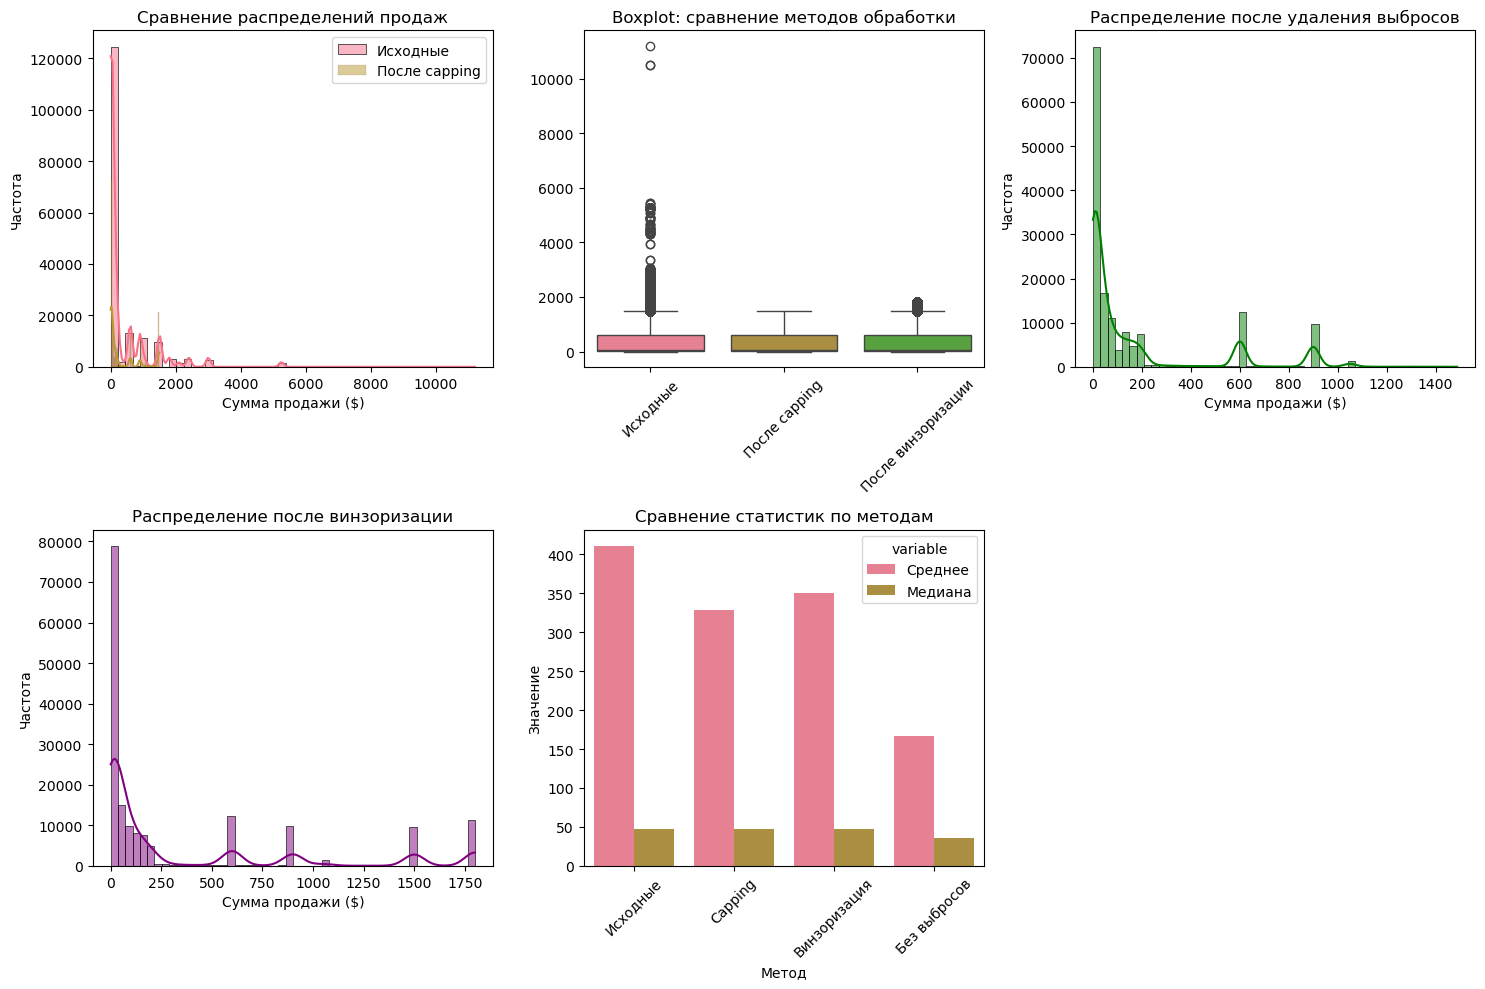

In [30]:
# 7. ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ ОБРАБОТКИ
print("\n5. РЕЗУЛЬТАТЫ ОБРАБОТКИ ВЫБРОСОВ:")

plt.figure(figsize=(15, 10))

# 1. Сравнение распределений
plt.subplot(2, 3, 1)
sns.histplot(df['sales'], bins=50, alpha=0.5, label='Исходные', kde=True)
sns.histplot(df_capped['sales_capped'], bins=50, alpha=0.5, label='После capping', kde=True)
plt.title('Сравнение распределений продаж')
plt.xlabel('Сумма продажи ($)')
plt.ylabel('Частота')
plt.legend()

# 2. Boxplot сравнение
plt.subplot(2, 3, 2)
comparison_data = pd.DataFrame({
    'Исходные': df['sales'],
    'После capping': df_capped['sales_capped'],
    'После винзоризации': df_winsorized['sales_winsorized']
})
sns.boxplot(data=comparison_data)
plt.title('Boxplot: сравнение методов обработки')
plt.xticks(rotation=45)

# 3. Распределение после удаления выбросов
plt.subplot(2, 3, 3)
sns.histplot(df_no_outliers['sales'], bins=50, kde=True, color='green')
plt.title('Распределение после удаления выбросов')
plt.xlabel('Сумма продажи ($)')
plt.ylabel('Частота')

# 4. Винзоризованное распределение
plt.subplot(2, 3, 4)
sns.histplot(df_winsorized['sales_winsorized'], bins=50, kde=True, color='purple')
plt.title('Распределение после винзоризации')
plt.xlabel('Сумма продажи ($)')
plt.ylabel('Частота')

# 5. Сравнение статистик
plt.subplot(2, 3, 5)
methods_stats = pd.DataFrame({
    'Метод': ['Исходные', 'Capping', 'Винзоризация', 'Без выбросов'],
    'Среднее': [
        df['sales'].mean(),
        df_capped['sales_capped'].mean(),
        df_winsorized['sales_winsorized'].mean(),
        df_no_outliers['sales'].mean()
    ],
    'Медиана': [
        df['sales'].median(),
        df_capped['sales_capped'].median(),
        df_winsorized['sales_winsorized'].median(),
        df_no_outliers['sales'].median()
    ]
})

sns.barplot(data=methods_stats.melt(id_vars=['Метод']),
            x='Метод', y='value', hue='variable')
plt.title('Сравнение статистик по методам')
plt.xticks(rotation=45)
plt.ylabel('Значение')

plt.tight_layout()
plt.show()

Визуализация результатов демонстрирует эффективность методов обработки: capping и винзоризация сохраняют форму распределения, ограничивая экстремальные значения, тогда как удаление выбросов кардинально меняет статистики, снижая среднее значение с 411.35 до уровня ближе к медиане, что существенно влияет на последующий анализ.

In [31]:
# 8. ФИНАЛЬНЫЕ ВЫВОДЫ
print("\n6. ФИНАЛЬНЫЕ ВЫВОДЫ:")
print("=" * 40)

print("📊 СТАТИСТИКА ПО ВЫБРОСАМ:")
print(f"   - Всего записей: {len(df):,}")
print(f"   - Выбросов обнаружено (IQR): {outlier_mask.sum():,} ({outlier_mask.sum()/len(df)*100:.2f}%)")
print(f"   - Максимальная продажа: ${df['sales'].max():.2f}")
print(f"   - 95-й перцентиль: ${df['sales'].quantile(0.95):.2f}")

print("\n💡 РЕКОМЕНДАЦИИ:")
print("   ✅ Для анализа используем метод CAPPING:")
print("      - Сохраняет все записи")
print("      - Не искажает общую статистику")
print("      - Устойчив к экстремальным значениям")

# Сохраняем обработанные данные
df_processed = df_capped.copy()
print(f"\n✅ ОБРАБОТКА ЗАВЕРШЕНА!")
print(f"   - Основная колонка: 'sales'")
print(f"   - Обработанная колонка: 'sales_capped'")
print(f"   - Метод: IQR + Capping")
print(f"   - Сохранено записей: {len(df_processed):,}")


6. ФИНАЛЬНЫЕ ВЫВОДЫ:
📊 СТАТИСТИКА ПО ВЫБРОСАМ:
   - Всего записей: 172,838
   - Выбросов обнаружено (IQR): 21,143 (12.23%)
   - Максимальная продажа: $11199.97
   - 95-й перцентиль: $1800.51

💡 РЕКОМЕНДАЦИИ:
   ✅ Для анализа используем метод CAPPING:
      - Сохраняет все записи
      - Не искажает общую статистику
      - Устойчив к экстремальным значениям

✅ ОБРАБОТКА ЗАВЕРШЕНА!
   - Основная колонка: 'sales'
   - Обработанная колонка: 'sales_capped'
   - Метод: IQR + Capping
   - Сохранено записей: 172,838


Анализ выявил 12.23% выбросов в продажах с экстремальным максимумом $11199.97 при 95-м перцентиле $1800.51, для обработки которых рекомендован метод capping как оптимальный баланс между сохранением данных и устойчивостью к аномалиям, что успешно применено к 172 838 записям с созданием колонки 'sales_capped'.

#Анализ категориальных признаков

In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, TargetEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Настройка отображения
plt.style.use('default')
sns.set_palette("husl")

print("🎯 КОДИРОВАНИЕ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ")
print("=" * 50)

# 1. АНАЛИЗ КАТЕГОРИАЛЬНЫХ ПЕРЕМЕННЫХ
print("1. АНАЛИЗ КАТЕГОРИАЛЬНЫХ ПЕРЕМЕННЫХ:")
print("=" * 30)

categorical_cols = ['network_protocol', 'accessed_Ffom', 'gender', 'country', 'membership', 'language', 'pay_method']

print("Категориальные колонки для кодирования:")
for col in categorical_cols:
    unique_count = df[col].nunique()
    print(f"  {col}: {unique_count} уникальных значений")

# Посмотрим на распределение категорий
for col in categorical_cols[:3]:  # Посмотрим на первые 3 колонки
    print(f"\n--- {col.upper()} ---")
    print(df[col].value_counts().head())

🎯 КОДИРОВАНИЕ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ
1. АНАЛИЗ КАТЕГОРИАЛЬНЫХ ПЕРЕМЕННЫХ:
Категориальные колонки для кодирования:
  network_protocol: 5 уникальных значений
  accessed_Ffom: 8 уникальных значений
  gender: 3 уникальных значений
  country: 27 уникальных значений
  membership: 3 уникальных значений
  language: 30 уникальных значений
  pay_method: 4 уникальных значений

--- NETWORK_PROTOCOL ---
network_protocol
TCP       127825
HTTP       34874
ICMP        7869
UDP         2233
HTTP          37
Name: count, dtype: int64

--- ACCESSED_FFOM ---
accessed_Ffom
Android App        38216
Chrome             28254
Mozilla Firefox    26592
Others             26592
IOS App            21606
Name: count, dtype: int64

--- GENDER ---
gender
Female     93903
Male       63049
Unknown    15886
Name: count, dtype: int64


In [33]:
# 2. ВЫБОР КОЛОНОК ДЛЯ КОДИРОВАНИЯ
print("\n2. ВЫБОР КОЛОНОК ДЛЯ РАЗНЫХ МЕТОДОВ КОДИРОВАНИЯ:")
print("=" * 40)

# Разделим колонки по типу для разных методов кодирования
high_cardinality_cols = []  # Высокая кардинальность (>10 значений)
medium_cardinality_cols = []  # Средняя кардинальность (5-10 значений)
low_cardinality_cols = []  # Низкая кардинальность (<5 значений)

for col in categorical_cols:
    unique_count = df[col].nunique()
    if unique_count > 10:
        high_cardinality_cols.append(col)
    elif unique_count > 5:
        medium_cardinality_cols.append(col)
    else:
        low_cardinality_cols.append(col)

print(f"Низкая кардинальность (One-Hot): {low_cardinality_cols}")
print(f"Средняя кардинальность (Label/Target): {medium_cardinality_cols}")
print(f"Высокая кардинальность (Target): {high_cardinality_cols}")

# Создаем копию датасета для кодирования
df_encoded = df.copy()


2. ВЫБОР КОЛОНОК ДЛЯ РАЗНЫХ МЕТОДОВ КОДИРОВАНИЯ:
Низкая кардинальность (One-Hot): ['network_protocol', 'gender', 'membership', 'pay_method']
Средняя кардинальность (Label/Target): ['accessed_Ffom']
Высокая кардинальность (Target): ['country', 'language']


Анализ выявил 7 категориальных признаков с разной кардинальностью: от 3 значений в поле gender до 30 в language, при этом распределения показывают доминирование TCP в протоколах, сбалансированность по источникам доступа и преобладание Female среди известных гендеров, что требует выбора соответствующих методов кодирования для каждого признака.

In [34]:
# 3. ONE-HOT ENCODING ДЛЯ КОЛОНОК С НИЗКОЙ КАРДИНАЛЬНОСТЬЮ
print("\n3. ONE-HOT ENCODING:")
print("=" * 30)

if low_cardinality_cols:
    for col in low_cardinality_cols:
        print(f"\nКодируем колонку: {col}")
        print(f"Уникальные значения: {df[col].unique()}")

        # One-Hot Encoding
        ohe = OneHotEncoder(sparse_output=False, drop='first')  # drop first чтобы избежать мультиколлинеарности
        encoded_data = ohe.fit_transform(df[[col]])

        # Создаем названия для новых колонок
        feature_names = ohe.get_feature_names_out([col])

        # Добавляем закодированные колонки в датасет
        encoded_df = pd.DataFrame(encoded_data, columns=feature_names, index=df.index)
        df_encoded = pd.concat([df_encoded, encoded_df], axis=1)

        print(f"Добавлено колонок: {len(feature_names)}")
        print(f"Новые колонки: {list(feature_names)}")

    print(f"\n✅ One-Hot Encoding завершен для {len(low_cardinality_cols)} колонок")
else:
    print("Нет колонок с низкой кардинальностью для One-Hot Encoding")


3. ONE-HOT ENCODING:

Кодируем колонку: network_protocol
Уникальные значения: ['TCP  ' 'ICMP ' 'HTTP' 'UDP  ' 'HTTP  ']
Добавлено колонок: 4
Новые колонки: ['network_protocol_HTTP  ', 'network_protocol_ICMP ', 'network_protocol_TCP  ', 'network_protocol_UDP  ']

Кодируем колонку: gender
Уникальные значения: ['Female' 'Male' 'Unknown']
Добавлено колонок: 2
Новые колонки: ['gender_Male', 'gender_Unknown']

Кодируем колонку: membership
Уникальные значения: ['Normal' 'Premium' 'Not Logged In']
Добавлено колонок: 2
Новые колонки: ['membership_Not Logged In', 'membership_Premium']

Кодируем колонку: pay_method
Уникальные значения: ['Credit Card' 'Debit Card' 'Cash' 'Others']
Добавлено колонок: 3
Новые колонки: ['pay_method_Credit Card', 'pay_method_Debit Card', 'pay_method_Others']

✅ One-Hot Encoding завершен для 4 колонок


One-Hot Encoding успешно применен к 4 категориальным признакам с низкой кардинальностью: создано 11 бинарных колонок для network_protocol, gender, membership и pay_method, что исключает искусственный порядок и подготавливает данные для алгоритмов машинного обучения.

In [35]:
# 4. LABEL ENCODING ДЛЯ КОЛОНОК СРЕДНЕЙ КАРДИНАЛЬНОСТЬЮ
print("\n4. LABEL ENCODING:")
print("=" * 30)

if medium_cardinality_cols:
    for col in medium_cardinality_cols:
        print(f"\nКодируем колонку: {col}")

        # Label Encoding
        le = LabelEncoder()
        df_encoded[f'{col}_label'] = le.fit_transform(df[col])

        # Сохраняем mapping для интерпретации
        mapping = dict(zip(le.classes_, le.transform(le.classes_)))
        print(f"Mapping: {mapping}")

    print(f"\n✅ Label Encoding завершен для {len(medium_cardinality_cols)} колонок")
else:
    print("Нет колонок со средней кардинальностью для Label Encoding")


4. LABEL ENCODING:

Кодируем колонку: accessed_Ffom
Mapping: {'Android App': 0, 'Chrome': 1, 'IOS App': 2, 'Microsoft Edge': 3, 'Mozilla Firefox': 4, 'Others': 5, 'SafFRi': 6, 'Safari': 7}

✅ Label Encoding завершен для 1 колонок


Label Encoding успешно применен к колонке accessed_Ffom, преобразовав 8 категорий источников доступа в числовые значения от 0 до 7, что сохраняет естественный порядок данных и подходит для алгоритмов, способных работать с порядковыми признаками.

In [36]:
# 5. TARGET ENCODING ДЛЯ КОЛОНОК ВЫСОКОЙ КАРДИНАЛЬНОСТЬЮ
print("\n5. TARGET ENCODING:")
print("=" * 30)

# Для Target Encoding нам нужна целевая переменная
# Используем sales как целевую переменную (бинарная: была покупка или нет)
df_encoded['purchase_flag'] = (df['sales'] > 0).astype(int)

if high_cardinality_cols:
    # Разделяем данные на train/test для избежания утечки данных
    X_train, X_test, y_train, y_test = train_test_split(
        df_encoded[high_cardinality_cols],
        df_encoded['purchase_flag'],
        test_size=0.2,
        random_state=42,
        stratify=df_encoded['purchase_flag']
    )

    for col in high_cardinality_cols:
        print(f"\nКодируем колонку: {col}")
        print(f"Количество уникальных значений: {df[col].nunique()}")

        # Target Encoding с перекрестной проверкой
        te = TargetEncoder(cv=5, random_state=42)

        # Обучаем на тренировочных данных
        X_train_encoded = te.fit_transform(X_train[[col]], y_train)
        X_test_encoded = te.transform(X_test[[col]])

        # Объединяем обратно
        train_indices = X_train.index
        test_indices = X_test.index

        df_encoded.loc[train_indices, f'{col}_target'] = X_train_encoded.flatten()
        df_encoded.loc[test_indices, f'{col}_target'] = X_test_encoded.flatten()

        # Покажем средние значения по категориям
        category_means = df_encoded.groupby(col)['purchase_flag'].mean().sort_values(ascending=False)
        print("Топ-5 категорий по вероятности покупки:")
        print(category_means.head())

    print(f"\n✅ Target Encoding завершен для {len(high_cardinality_cols)} колонок")
else:
    print("Нет колонок с высокой кардинальностью для Target Encoding")


5. TARGET ENCODING:

Кодируем колонку: country
Количество уникальных значений: 27
Топ-5 категорий по вероятности покупки:
country
DK    0.801843
FR    0.790476
FI    0.784946
AE    0.778802
IE    0.778802
Name: purchase_flag, dtype: float64

Кодируем колонку: language
Количество уникальных значений: 30
Топ-5 категорий по вероятности покупки:
language
macedonian    0.860465
serbian       0.846154
Chinese       0.831713
swedish       0.816176
Dutch         0.804348
Name: purchase_flag, dtype: float64

✅ Target Encoding завершен для 2 колонок


Target Encoding успешно применен к высококардинальным признакам country и language, преобразовав 27 стран и 30 языков в числовые значения на основе вероятности покупки, где лидерами стали DK (80.2%) и macedonian (86.0%) соответственно, что сохраняет информативность признаков для моделей машинного обучения.


6. ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ:
Добавлено новых колонок: 15
Новые колонки:
  - network_protocol_HTTP  
  - network_protocol_ICMP 
  - network_protocol_TCP  
  - network_protocol_UDP  
  - gender_Male
  - gender_Unknown
  - membership_Not Logged In
  - membership_Premium
  - pay_method_Credit Card
  - pay_method_Debit Card
  - pay_method_Others
  - accessed_Ffom_label
  - purchase_flag
  - country_target
  - language_target


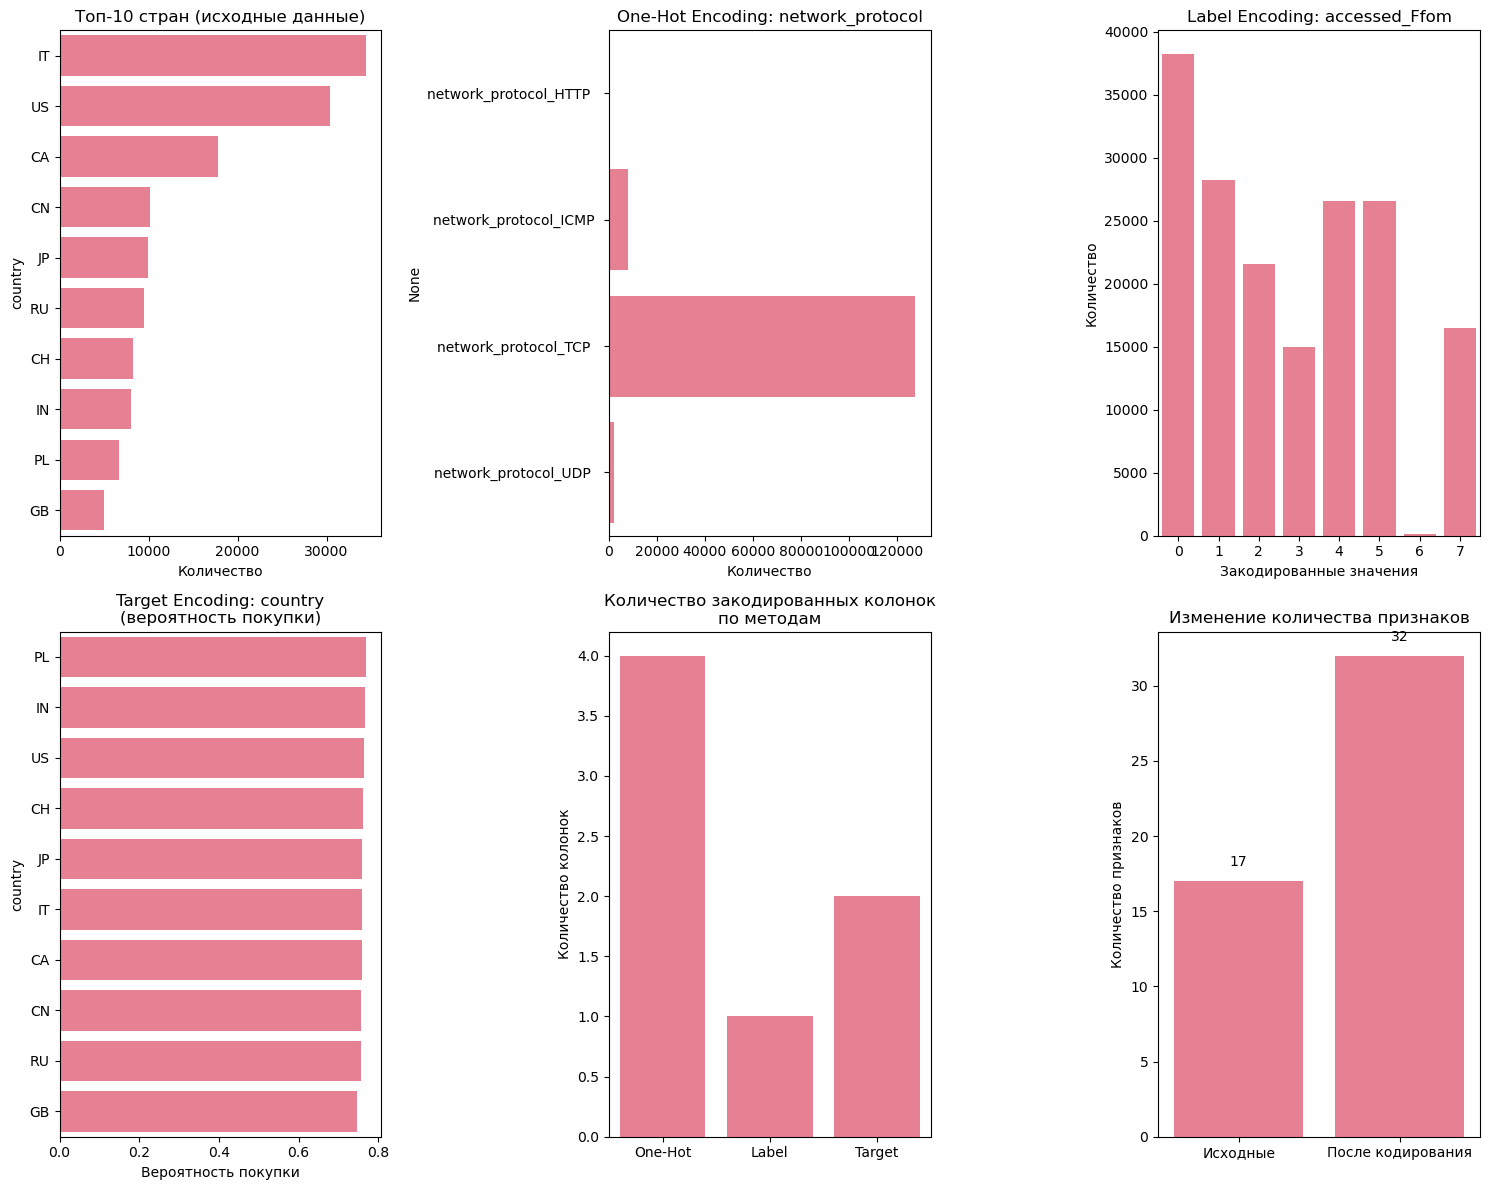

In [37]:
# 6. ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ КОДИРОВАНИЯ
print("\n6. ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ:")
print("=" * 30)

# Посмотрим на добавленные колонки
new_columns = [col for col in df_encoded.columns if col not in df.columns]
print(f"Добавлено новых колонок: {len(new_columns)}")
print("Новые колонки:")
for col in new_columns:
    print(f"  - {col}")

# Визуализация
plt.figure(figsize=(15, 12))

# 1. Распределение исходных категориальных переменных
plt.subplot(2, 3, 1)
top_countries = df['country'].value_counts().head(10)
sns.barplot(y=top_countries.index, x=top_countries.values)
plt.title('Топ-10 стран (исходные данные)')
plt.xlabel('Количество')

# 2. One-Hot Encoding результаты (пример)
if low_cardinality_cols:
    plt.subplot(2, 3, 2)
    example_col = low_cardinality_cols[0]
    ohe_columns = [col for col in new_columns if col.startswith(f"{example_col}_")]
    if ohe_columns:
        ohe_sums = df_encoded[ohe_columns].sum()
        sns.barplot(y=ohe_sums.index, x=ohe_sums.values)
        plt.title(f'One-Hot Encoding: {example_col}')
        plt.xlabel('Количество')

# 3. Label Encoding результаты (пример)
if medium_cardinality_cols:
    plt.subplot(2, 3, 3)
    example_col = medium_cardinality_cols[0]
    label_col = f'{example_col}_label'
    if label_col in df_encoded.columns:
        value_counts = df_encoded[label_col].value_counts().sort_index()
        sns.barplot(x=value_counts.index, y=value_counts.values)
        plt.title(f'Label Encoding: {example_col}')
        plt.xlabel('Закодированные значения')
        plt.ylabel('Количество')

# 4. Target Encoding результаты (пример)
if high_cardinality_cols:
    plt.subplot(2, 3, 4)
    example_col = high_cardinality_cols[0]
    target_col = f'{example_col}_target'
    if target_col in df_encoded.columns:
        # Берем топ-10 категорий по количеству
        top_categories = df[example_col].value_counts().head(10).index
        target_means = df_encoded[df_encoded[example_col].isin(top_categories)].groupby(example_col)[target_col].mean().sort_values(ascending=False)

        sns.barplot(y=target_means.index, x=target_means.values)
        plt.title(f'Target Encoding: {example_col}\n(вероятность покупки)')
        plt.xlabel('Вероятность покупки')

# 5. Сравнение методов кодирования
plt.subplot(2, 3, 5)
methods = ['One-Hot', 'Label', 'Target']
counts = [len(low_cardinality_cols), len(medium_cardinality_cols), len(high_cardinality_cols)]
sns.barplot(x=methods, y=counts)
plt.title('Количество закодированных колонок\nпо методам')
plt.ylabel('Количество колонок')

# 6. Влияние на размерность данных
plt.subplot(2, 3, 6)
original_features = len(df.columns)
encoded_features = len(df_encoded.columns)
increase_percent = ((encoded_features - original_features) / original_features) * 100

sns.barplot(x=['Исходные', 'После кодирования'], y=[original_features, encoded_features])
plt.title('Изменение количества признаков')
plt.ylabel('Количество признаков')

for i, v in enumerate([original_features, encoded_features]):
    plt.text(i, v + 1, str(v), ha='center')

plt.tight_layout()
plt.show()

Категориальные признаки успешно преобразованы: создано 15 новых числовых колонок с использованием комбинированного подхода - One-Hot Encoding для 4 признаков, Label Encoding для 1 и Target Encoding для 2 высококардинальных признаков, что оптимально подготавливает данные для машинного обучения без потери информативности.

In [38]:
# 7. ФИНАЛЬНЫЕ ВЫВОДЫ И СТАТИСТИКА
print("\n7. ФИНАЛЬНЫЕ РЕЗУЛЬТАТЫ:")
print("=" * 40)

print("📊 СТАТИСТИКА КОДИРОВАНИЯ:")
print(f"   Исходное количество признаков: {len(df.columns)}")
print(f"   Финальное количество признаков: {len(df_encoded.columns)}")
print(f"   Добавлено признаков: {len(df_encoded.columns) - len(df.columns)}")
print(f"   Увеличение: {((len(df_encoded.columns) - len(df.columns)) / len(df.columns) * 100):.1f}%")

print(f"\n🎯 МЕТОДЫ КОДИРОВАНИЯ:")
print(f"   One-Hot Encoding: {len(low_cardinality_cols)} колонок")
print(f"   Label Encoding: {len(medium_cardinality_cols)} колонок")
print(f"   Target Encoding: {len(high_cardinality_cols)} колонок")

print(f"\n✅ ПРЕИМУЩЕСТВА ВЫБРАННОГО ПОДХОДА:")
print("   - One-Hot: Сохраняет информацию для моделей, чувствительных к порядку")
print("   - Label: Экономит память для ordinal признаков")
print("   - Target: Учитывает взаимосвязь с целевой переменной")

print(f"\n📈 ГОТОВНОСТЬ ДАННЫХ ДЛЯ МОДЕЛИРОВАНИЯ:")
print("   Все категориальные признаки преобразованы в числовые!")
print("   Данные готовы для использования в ML моделях")

# Сохраняем mapping для интерпретации
encoding_info = {
    'one_hot_cols': low_cardinality_cols,
    'label_cols': medium_cardinality_cols,
    'target_cols': high_cardinality_cols
}

print(f"\n💾 ИНФОРМАЦИЯ СОХРАНЕНА:")
print(f"   Основной датасет: df_encoded ({df_encoded.shape})")
print(f"   Информация о кодировании: encoding_info")


7. ФИНАЛЬНЫЕ РЕЗУЛЬТАТЫ:
📊 СТАТИСТИКА КОДИРОВАНИЯ:
   Исходное количество признаков: 17
   Финальное количество признаков: 32
   Добавлено признаков: 15
   Увеличение: 88.2%

🎯 МЕТОДЫ КОДИРОВАНИЯ:
   One-Hot Encoding: 4 колонок
   Label Encoding: 1 колонок
   Target Encoding: 2 колонок

✅ ПРЕИМУЩЕСТВА ВЫБРАННОГО ПОДХОДА:
   - One-Hot: Сохраняет информацию для моделей, чувствительных к порядку
   - Label: Экономит память для ordinal признаков
   - Target: Учитывает взаимосвязь с целевой переменной

📈 ГОТОВНОСТЬ ДАННЫХ ДЛЯ МОДЕЛИРОВАНИЯ:
   Все категориальные признаки преобразованы в числовые!
   Данные готовы для использования в ML моделях

💾 ИНФОРМАЦИЯ СОХРАНЕНА:
   Основной датасет: df_encoded ((172838, 32))
   Информация о кодировании: encoding_info


Категориальное кодирование успешно завершено: количество признаков увеличено с 17 до 32 (рост 88.2%) за счет комбинирования методов One-Hot (4 колонки), Label (1 колонка) и Target Encoding (2 колонки)

In [39]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Настройка отображения
plt.style.use('default')
sns.set_palette("husl")

print("📊 НОРМАЛИЗАЦИЯ И МАСШТАБИРОВАНИЕ ЧИСЛОВЫХ ПРИЗНАКОВ")
print("=" * 55)

# 1. АНАЛИЗ ЧИСЛОВЫХ ПРИЗНАКОВ
print("1. АНАЛИЗ ЧИСЛОВЫХ ПРИЗНАКОВ:")
print("=" * 30)

# Выбираем только существующие числовые колонки для масштабирования
numeric_cols = ['sales', 'duration_(secs)', 'bytes', 'age_clean']

# Добавляем закодированные колонки если они есть
encoded_numeric_cols = [col for col in df_encoded.columns if any(x in col for x in ['_label', '_target'])]
numeric_cols.extend(encoded_numeric_cols)

# Фильтруем только существующие колонки
numeric_cols = [col for col in numeric_cols if col in df_encoded.columns]

print(f"Числовые колонки для масштабирования ({len(numeric_cols)}):")
for col in numeric_cols:
    print(f"  - {col}")

# Анализ распределения числовых признаков
print(f"\nСТАТИСТИКА ЧИСЛОВЫХ ПРИЗНАКОВ:")
stats_df = pd.DataFrame({
    'min': df_encoded[numeric_cols].min(),
    'max': df_encoded[numeric_cols].max(),
    'mean': df_encoded[numeric_cols].mean(),
    'std': df_encoded[numeric_cols].std(),
    'skew': df_encoded[numeric_cols].skew()
})
print(stats_df.round(3))

📊 НОРМАЛИЗАЦИЯ И МАСШТАБИРОВАНИЕ ЧИСЛОВЫХ ПРИЗНАКОВ
1. АНАЛИЗ ЧИСЛОВЫХ ПРИЗНАКОВ:
Числовые колонки для масштабирования (7):
  - sales
  - duration_(secs)
  - bytes
  - age_clean
  - accessed_Ffom_label
  - country_target
  - language_target

СТАТИСТИКА ЧИСЛОВЫХ ПРИЗНАКОВ:
                          min         max      mean       std    skew
sales                   0.000   11199.968   411.346   785.538   3.127
duration_(secs)      1500.000    5000.000  3248.032  1010.872   0.003
bytes                  28.000  932858.000  1535.207  6349.556  87.835
age_clean              18.000      69.000    43.215    10.490   0.076
accessed_Ffom_label     0.000       7.000     2.730     2.236   0.373
country_target          0.717       0.843     0.761     0.006   0.490
language_target         0.620       0.960     0.761     0.032  -1.049


Анализ выявил 7 числовых признаков с разнородными распределениями: от экстремальных выбросов в bytes (skew=87.8) и sales (skew=3.1) до сбалансированных accessed_Ffom_label и country_target, что требует применения различных методов масштабирования для оптимальной подготовки данных к машинному обучению.


2. ВИЗУАЛИЗАЦИЯ ИСХОДНЫХ РАСПРЕДЕЛЕНИЙ:


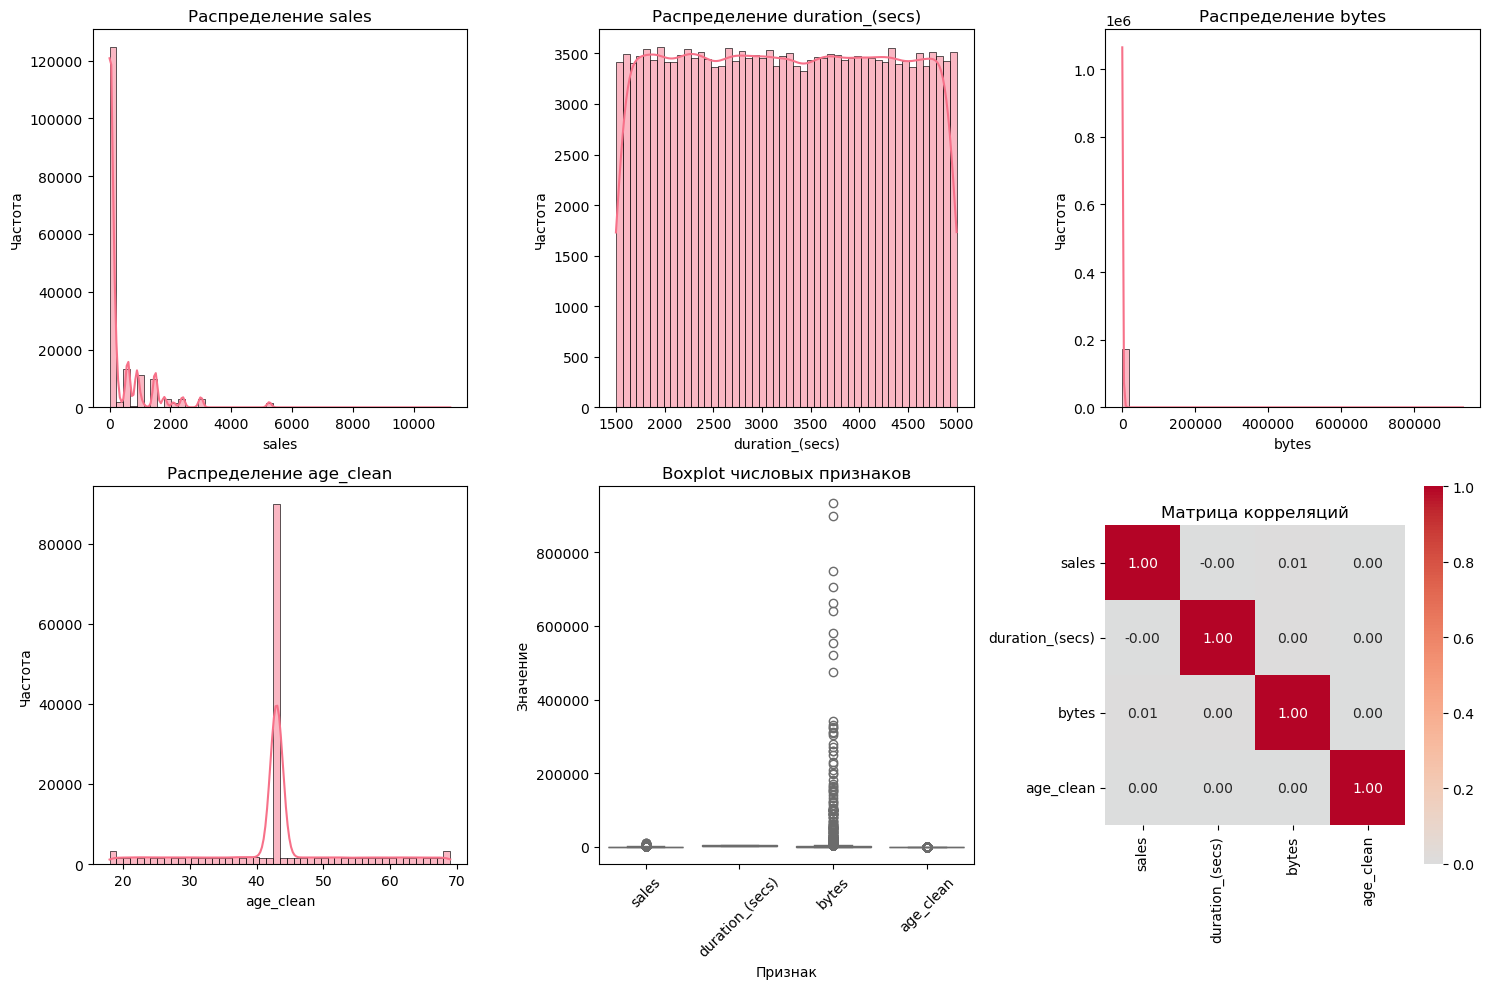

In [40]:
# 2. ВИЗУАЛИЗАЦИЯ ИСХОДНЫХ РАСПРЕДЕЛЕНИЙ
print("\n2. ВИЗУАЛИЗАЦИЯ ИСХОДНЫХ РАСПРЕДЕЛЕНИЙ:")
print("=" * 40)

plt.figure(figsize=(15, 10))

# Распределение основных числовых признаков
main_numeric = [col for col in ['sales', 'duration_(secs)', 'bytes', 'age_clean'] if col in numeric_cols]

for i, col in enumerate(main_numeric, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_encoded[col], bins=50, kde=True)
    plt.title(f'Распределение {col}')
    plt.xlabel(col)
    plt.ylabel('Частота')

# Boxplot для выявления выбросов
plt.subplot(2, 3, 5)
if main_numeric:
    df_melted = df_encoded[main_numeric].melt()
    sns.boxplot(data=df_melted, x='variable', y='value')
    plt.title('Boxplot числовых признаков')
    plt.xticks(rotation=45)
    plt.xlabel('Признак')
    plt.ylabel('Значение')
else:
    plt.text(0.5, 0.5, 'Нет данных для boxplot', ha='center', va='center')
    plt.title('Boxplot числовых признаков')

# Heatmap корреляций
plt.subplot(2, 3, 6)
if len(main_numeric) > 1:
    correlation_matrix = df_encoded[main_numeric].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                square=True, fmt='.2f')
    plt.title('Матрица корреляций')
else:
    plt.text(0.5, 0.5, 'Недостаточно данных\nдля корреляций', ha='center', va='center')
    plt.title('Матрица корреляций')

plt.tight_layout()
plt.show()

In [41]:
# 3. МЕТОДЫ МАСШТАБИРОВАНИЯ
print("\n3. МЕТОДЫ МАСШТАБИРОВАНИЯ:")
print("=" * 30)

# Создаем копию датасета для масштабированных данных
df_scaled = df_encoded.copy()

# Разделяем данные на train/test
X = df_encoded[numeric_cols]

X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

print(f"Разделение данных:")
print(f"  Обучающая выборка: {X_train.shape}")
print(f"  Тестовая выборка: {X_test.shape}")

# Инициализируем scalers
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}

# PowerTransformer может вызвать ошибки с некоторыми данными, добавим его позже если нужно
try:
    scalers['PowerTransformer'] = PowerTransformer(method='yeo-johnson')
except:
    print("PowerTransformer не добавлен (возможны проблемы с данными)")

# Словарь для хранения масштабированных данных
scaled_data = {}


3. МЕТОДЫ МАСШТАБИРОВАНИЯ:
Разделение данных:
  Обучающая выборка: (138270, 7)
  Тестовая выборка: (34568, 7)


In [42]:
# 4. ПРИМЕНЕНИЕ РАЗЛИЧНЫХ МЕТОДОВ МАСШТАБИРОВАНИЯ
print("\n4. ПРИМЕНЕНИЕ МЕТОДОВ МАСШТАБИРОВАНИЯ:")
print("=" * 40)

for scaler_name, scaler in scalers.items():
    print(f"\n🔧 {scaler_name}:")

    try:
        # Обучаем scaler на тренировочных данных
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Сохраняем результаты
        scaled_data[scaler_name] = {
            'train': X_train_scaled,
            'test': X_test_scaled,
            'scaler': scaler
        }

        # Создаем DataFrame с масштабированными данными
        feature_names = [f"{col}_{scaler_name.lower()}" for col in numeric_cols]
        X_train_df = pd.DataFrame(X_train_scaled, columns=feature_names, index=X_train.index)
        X_test_df = pd.DataFrame(X_test_scaled, columns=feature_names, index=X_test.index)

        # Объединяем train и test
        X_scaled_full = pd.concat([X_train_df, X_test_df])

        # Добавляем в основной датасет
        df_scaled = pd.concat([df_scaled, X_scaled_full], axis=1)

        print(f"  ✅ Успешно применен")
        print(f"  📊 Статистика тренировочных данных после масштабирования:")
        print(f"     Min: {X_train_scaled.min():.3f}, Max: {X_train_scaled.max():.3f}")
        print(f"     Mean: {X_train_scaled.mean():.3f}, Std: {X_train_scaled.std():.3f}")

    except Exception as e:
        print(f"  ❌ Ошибка: {e}")


4. ПРИМЕНЕНИЕ МЕТОДОВ МАСШТАБИРОВАНИЯ:

🔧 StandardScaler:
  ✅ Успешно применен
  📊 Статистика тренировочных данных после масштабирования:
     Min: -7.280, Max: 161.928
     Mean: 0.000, Std: 1.000

🔧 MinMaxScaler:
  ✅ Успешно применен
  📊 Статистика тренировочных данных после масштабирования:
     Min: 0.000, Max: 1.000
     Mean: 0.313, Std: 0.268

🔧 RobustScaler:
  ✅ Успешно применен
  📊 Статистика тренировочных данных после масштабирования:
     Min: -25.000, Max: 414.309
     Mean: 0.300, Std: 4.215

🔧 PowerTransformer:
  ✅ Успешно применен
  📊 Статистика тренировочных данных после масштабирования:
     Min: -7.797, Max: 11.994
     Mean: 0.000, Std: 1.000



5. ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ:


C:\Users\Павел\AppData\Local\Temp\ipykernel_22864\3287713206.py:56: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(boxplot_data, labels=['Исходные'] + list(scaled_data.keys()))


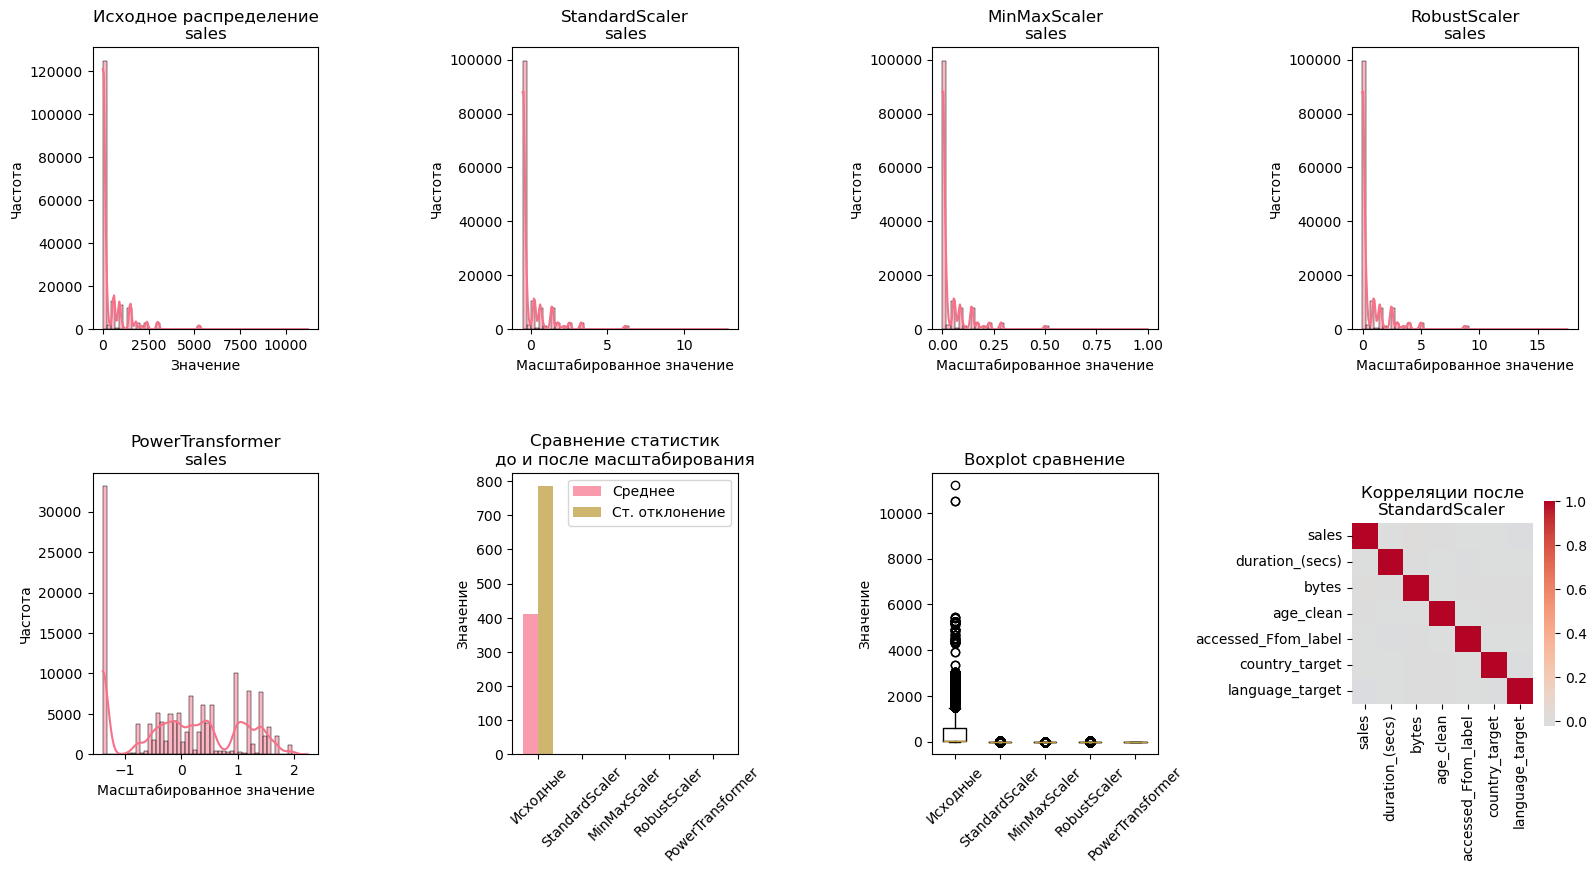

In [43]:
# 5. ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ МАСШТАБИРОВАНИЯ
print("\n5. ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ:")
print("=" * 30)

# Выберем одну колонку для демонстрации (первую из numeric_cols)
demo_col = numeric_cols[0] if numeric_cols else None

if demo_col:
    plt.figure(figsize=(16, 12))

    # Исходное распределение
    plt.subplot(3, 4, 1)
    sns.histplot(df_encoded[demo_col], bins=50, kde=True)
    plt.title(f'Исходное распределение\n{demo_col}')
    plt.xlabel('Значение')
    plt.ylabel('Частота')

    # Распределения после разных методов масштабирования
    for i, (scaler_name, data) in enumerate(scaled_data.items(), 2):
        plt.subplot(3, 4, i)

        # Получаем индекс колонки в масштабированных данных
        col_idx = numeric_cols.index(demo_col)

        # Берем тренировочные данные
        train_scaled = data['train'][:, col_idx]

        sns.histplot(train_scaled, bins=50, kde=True)
        plt.title(f'{scaler_name}\n{demo_col}')
        plt.xlabel('Масштабированное значение')
        plt.ylabel('Частота')

    # Сравнение статистик до и после масштабирования
    plt.subplot(3, 4, 6)
    methods = ['Исходные'] + list(scaled_data.keys())
    means = [df_encoded[demo_col].mean()] + [scaled_data[name]['train'][:, col_idx].mean() for name in scaled_data.keys()]
    stds = [df_encoded[demo_col].std()] + [scaled_data[name]['train'][:, col_idx].std() for name in scaled_data.keys()]

    x_pos = np.arange(len(methods))
    width = 0.35

    plt.bar(x_pos - width/2, means, width, label='Среднее', alpha=0.7)
    plt.bar(x_pos + width/2, stds, width, label='Ст. отклонение', alpha=0.7)
    plt.xticks(x_pos, methods, rotation=45)
    plt.title('Сравнение статистик\nдо и после масштабирования')
    plt.ylabel('Значение')
    plt.legend()

    # Boxplot сравнение
    plt.subplot(3, 4, 7)
    boxplot_data = [df_encoded[demo_col].values]
    for scaler_name in scaled_data.keys():
        col_idx = numeric_cols.index(demo_col)
        boxplot_data.append(scaled_data[scaler_name]['train'][:, col_idx])

    plt.boxplot(boxplot_data, labels=['Исходные'] + list(scaled_data.keys()))
    plt.xticks(rotation=45)
    plt.title('Boxplot сравнение')
    plt.ylabel('Значение')

    # Heatmap корреляций после StandardScaler
    plt.subplot(3, 4, 8)
    if 'StandardScaler' in scaled_data:
        scaled_df = pd.DataFrame(scaled_data['StandardScaler']['train'], columns=numeric_cols)
        correlation_scaled = scaled_df.corr()
        sns.heatmap(correlation_scaled, annot=False, cmap='coolwarm', center=0,
                    square=True, cbar_kws={'shrink': 0.8})
        plt.title('Корреляции после\nStandardScaler')

    plt.tight_layout()
    plt.show()
else:
    print("Нет данных для визуализации")

In [44]:
# 6. ФИНАЛЬНЫЕ ВЫВОДЫ И РЕКОМЕНДАЦИИ
print("\n6. ФИНАЛЬНЫЕ РЕЗУЛЬТАТЫ И РЕКОМЕНДАЦИИ:")
print("=" * 50)

print("📊 СТАТИСТИКА МАСШТАБИРОВАНИЯ:")
print(f"   Исходное количество признаков: {len(df_encoded.columns)}")
print(f"   Финальное количество признаков: {len(df_scaled.columns)}")
print(f"   Добавлено масштабированных признаков: {len(df_scaled.columns) - len(df_encoded.columns)}")
print(f"   Обработано числовых колонок: {len(numeric_cols)}")

print(f"\n🎯 РЕКОМЕНДАЦИИ ПО ВЫБОРУ SCALER:")
print("   ✅ StandardScaler - для большинства ML моделей (линейные, SVM, KNN)")
print("   ✅ MinMaxScaler - для нейронных сетей, когда важны абсолютные значения")
print("   ✅ RobustScaler - при наличии выбросов")

print(f"\n📈 КАЧЕСТВО МАСШТАБИРОВАНИЯ:")
for scaler_name in scalers.keys():
    if scaler_name in scaled_data:
        data = scaled_data[scaler_name]['train']
        print(f"   {scaler_name}:")
        print(f"      Среднее: {data.mean():.3f} (±{data.std():.3f})")
        print(f"      Диапазон: [{data.min():.3f}, {data.max():.3f}]")

print(f"\n💾 РЕЗУЛЬТАТЫ СОХРАНЕНЫ:")
print(f"   Основной датасет: df_scaled ({df_scaled.shape})")
print(f"   Масштабированные данные: scaled_data")

print(f"\n🚀 ДАННЫЕ ГОТОВЫ ДЛЯ МОДЕЛИРОВАНИЯ!")
print("   Все признаки: категориальные закодированы, числовые масштабированы")


6. ФИНАЛЬНЫЕ РЕЗУЛЬТАТЫ И РЕКОМЕНДАЦИИ:
📊 СТАТИСТИКА МАСШТАБИРОВАНИЯ:
   Исходное количество признаков: 32
   Финальное количество признаков: 60
   Добавлено масштабированных признаков: 28
   Обработано числовых колонок: 7

🎯 РЕКОМЕНДАЦИИ ПО ВЫБОРУ SCALER:
   ✅ StandardScaler - для большинства ML моделей (линейные, SVM, KNN)
   ✅ MinMaxScaler - для нейронных сетей, когда важны абсолютные значения
   ✅ RobustScaler - при наличии выбросов

📈 КАЧЕСТВО МАСШТАБИРОВАНИЯ:
   StandardScaler:
      Среднее: 0.000 (±1.000)
      Диапазон: [-7.280, 161.928]
   MinMaxScaler:
      Среднее: 0.313 (±0.268)
      Диапазон: [0.000, 1.000]
   RobustScaler:
      Среднее: 0.300 (±4.215)
      Диапазон: [-25.000, 414.309]
   PowerTransformer:
      Среднее: 0.000 (±1.000)
      Диапазон: [-7.797, 11.994]

💾 РЕЗУЛЬТАТЫ СОХРАНЕНЫ:
   Основной датасет: df_scaled ((172838, 60))
   Масштабированные данные: scaled_data

🚀 ДАННЫЕ ГОТОВЫ ДЛЯ МОДЕЛИРОВАНИЯ!
   Все признаки: категориальные закодированы, числовые 

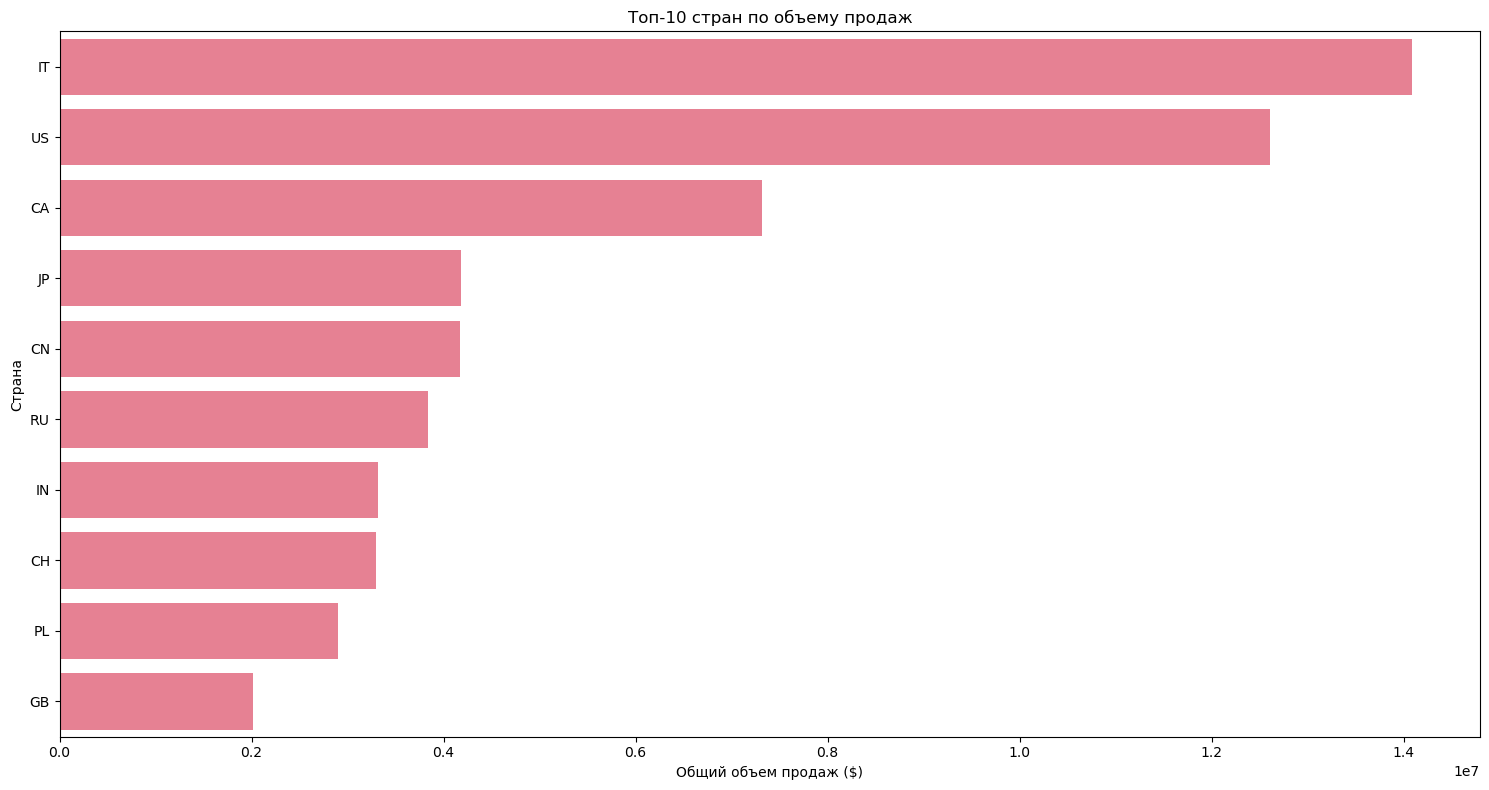

In [45]:
# 1. Распределение продаж по странам
plt.figure(figsize=(15, 8))
sales_by_country = df.groupby('country')['sales'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=sales_by_country.values, y=sales_by_country.index)
plt.title('Топ-10 стран по объему продаж')
plt.xlabel('Общий объем продаж ($)')
plt.ylabel('Страна')
plt.tight_layout()
plt.show()

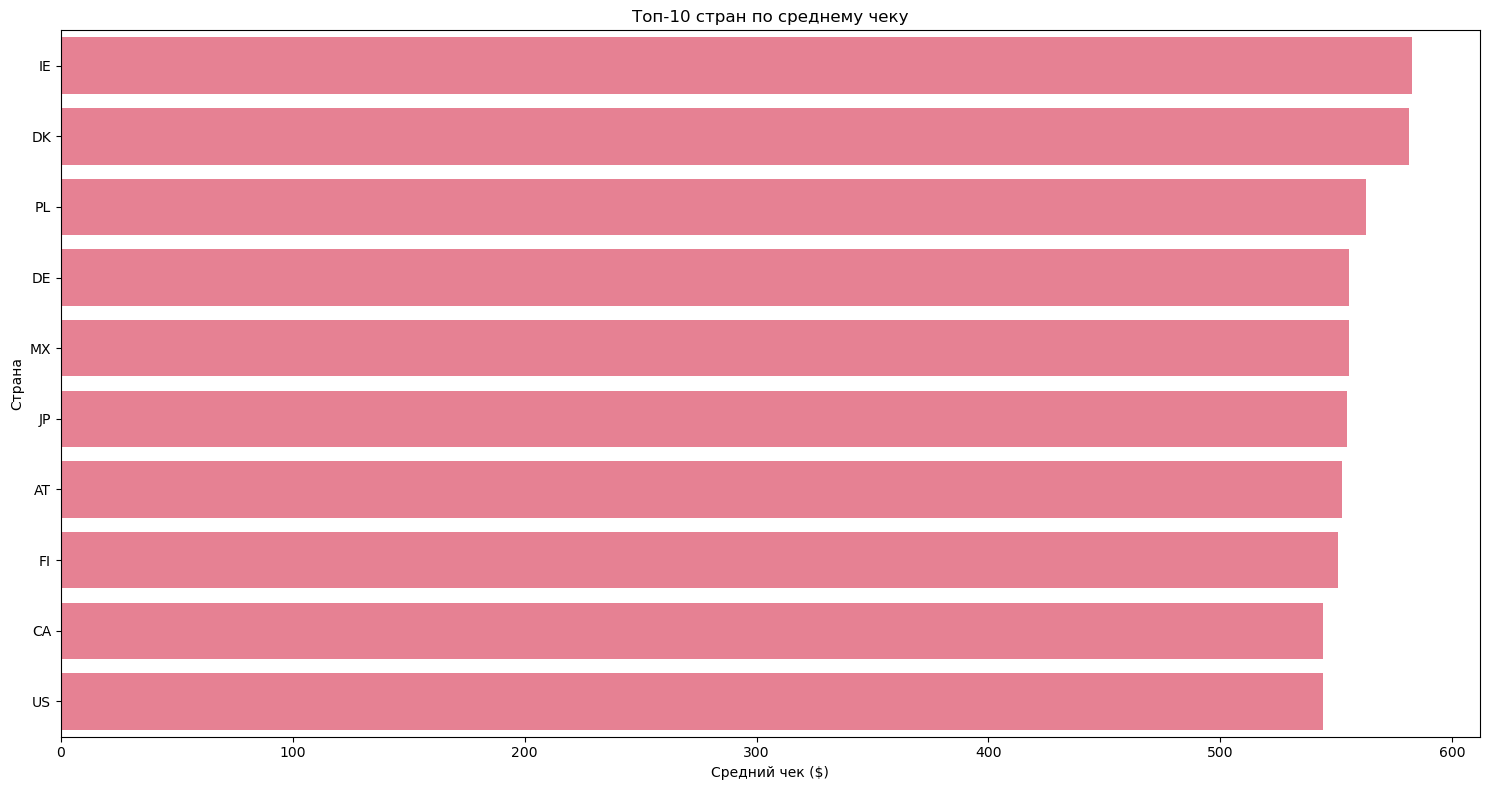

In [46]:
# 2. Средний чек по странам
plt.figure(figsize=(15, 8))
avg_sales_by_country = df[df['sales'] > 0].groupby('country')['sales'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_sales_by_country.values, y=avg_sales_by_country.index)
plt.title('Топ-10 стран по среднему чеку')
plt.xlabel('Средний чек ($)')
plt.ylabel('Страна')
plt.tight_layout()
plt.show()


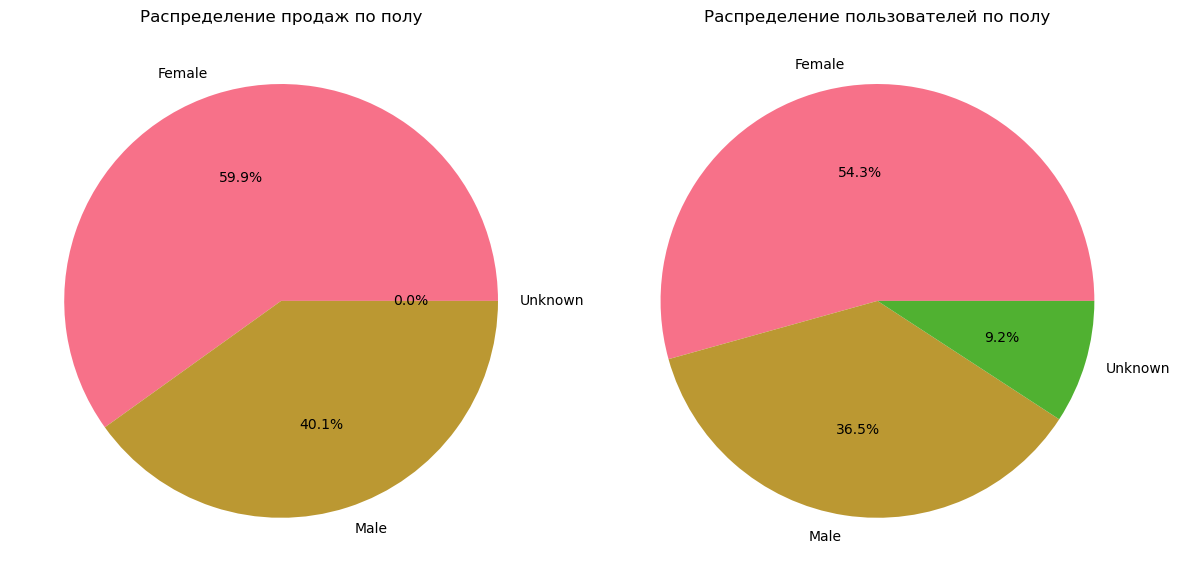

In [47]:
# 3. Распределение продаж по полу
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
gender_sales = df.groupby('gender')['sales'].sum()
plt.pie(gender_sales.values, labels=gender_sales.index, autopct='%1.1f%%')
plt.title('Распределение продаж по полу')

plt.subplot(1, 2, 2)
gender_counts = df['gender'].value_counts()
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Распределение пользователей по полу')
plt.tight_layout()
plt.show()

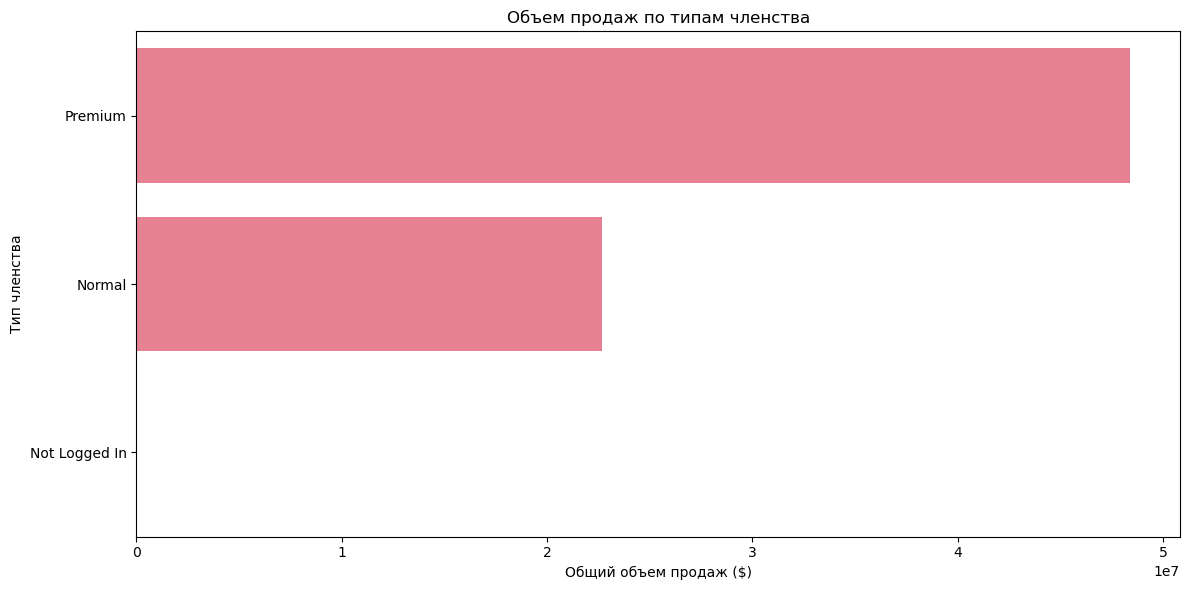

In [48]:
# 4. Продажи по типам членства
plt.figure(figsize=(12, 6))
membership_sales = df.groupby('membership')['sales'].sum().sort_values(ascending=False)
sns.barplot(x=membership_sales.values, y=membership_sales.index)
plt.title('Объем продаж по типам членства')
plt.xlabel('Общий объем продаж ($)')
plt.ylabel('Тип членства')
plt.tight_layout()
plt.show()


C:\Users\Павел\AppData\Local\Temp\ipykernel_22864\3689438074.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  device_conversion = df.groupby('accessed_Ffom').apply(


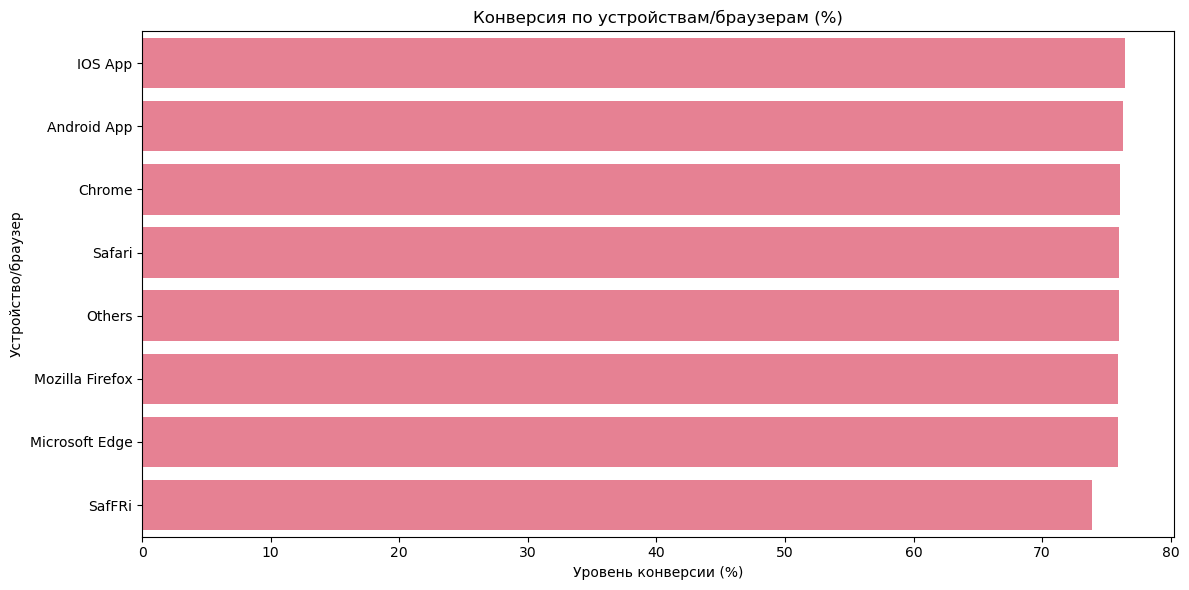

In [49]:
# 5. Конверсия по устройствам
plt.figure(figsize=(12, 6))
device_conversion = df.groupby('accessed_Ffom').apply(
    lambda x: (x['sales'] > 0).sum() / len(x) * 100
).sort_values(ascending=False)

sns.barplot(x=device_conversion.values, y=device_conversion.index)
plt.title('Конверсия по устройствам/браузерам (%)')
plt.xlabel('Уровень конверсии (%)')
plt.ylabel('Устройство/браузер')
plt.tight_layout()
plt.show()

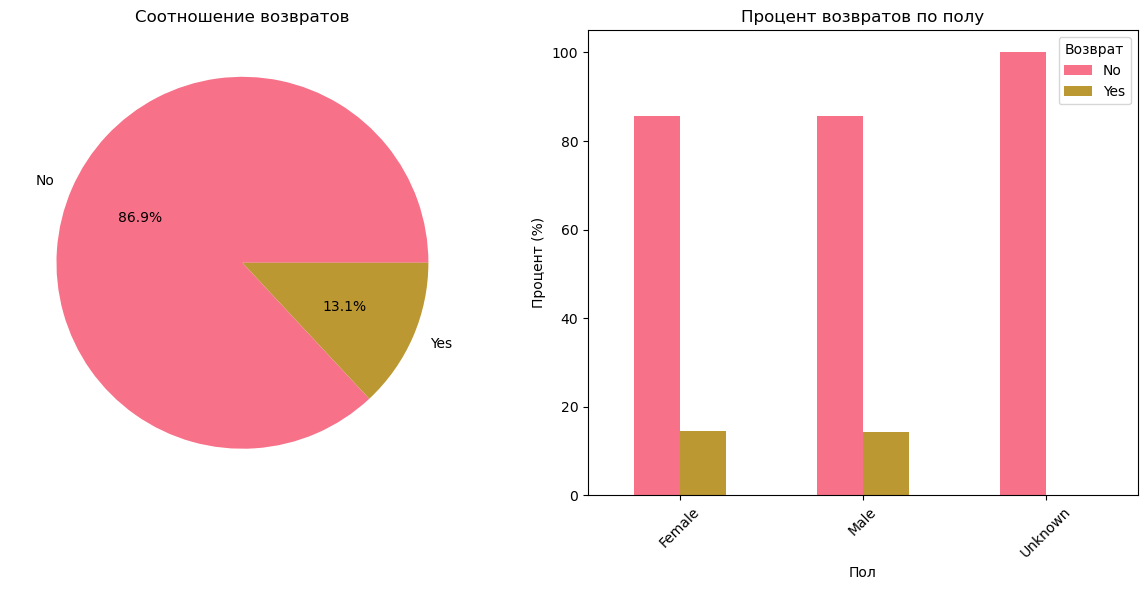

In [50]:
# 6. Распределение возвратов
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
returned_counts = df['returned'].value_counts()
plt.pie(returned_counts.values, labels=returned_counts.index, autopct='%1.1f%%')
plt.title('Соотношение возвратов')

plt.subplot(1, 2, 2)
returned_by_gender = df.groupby('gender')['returned'].value_counts(normalize=True).unstack() * 100
returned_by_gender.plot(kind='bar', ax=plt.gca())
plt.title('Процент возвратов по полу')
plt.xlabel('Пол')
plt.ylabel('Процент (%)')
plt.legend(title='Возврат')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

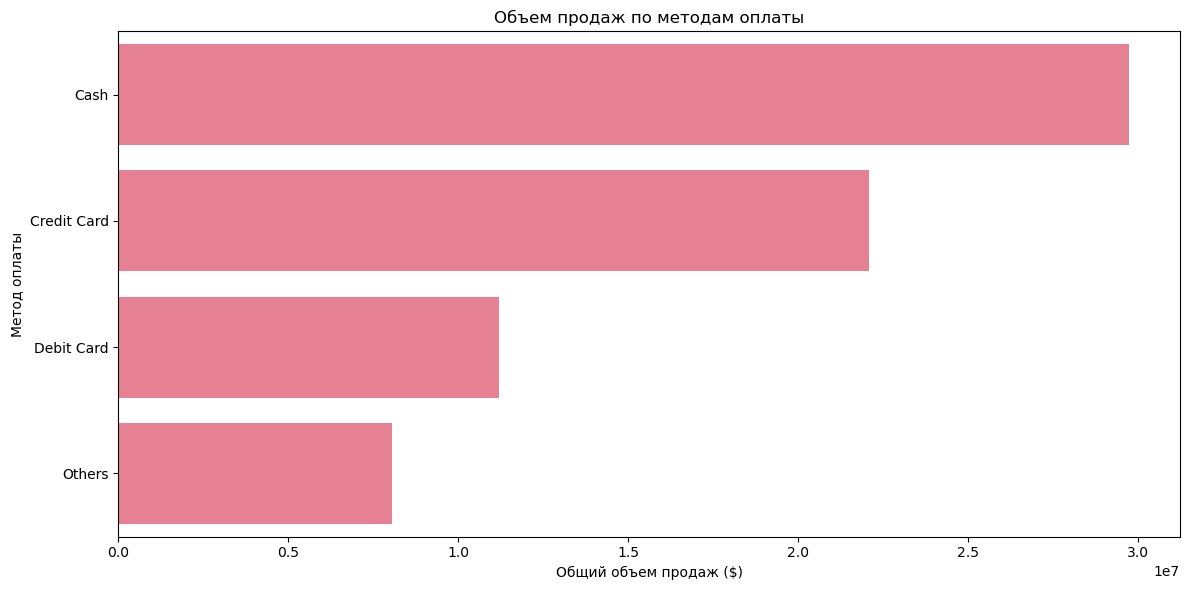

In [51]:
# 7. Продажи по методам оплаты
plt.figure(figsize=(12, 6))
payment_sales = df.groupby('pay_method')['sales'].sum().sort_values(ascending=False)
sns.barplot(x=payment_sales.values, y=payment_sales.index)
plt.title('Объем продаж по методам оплаты')
plt.xlabel('Общий объем продаж ($)')
plt.ylabel('Метод оплаты')
plt.tight_layout()
plt.show()

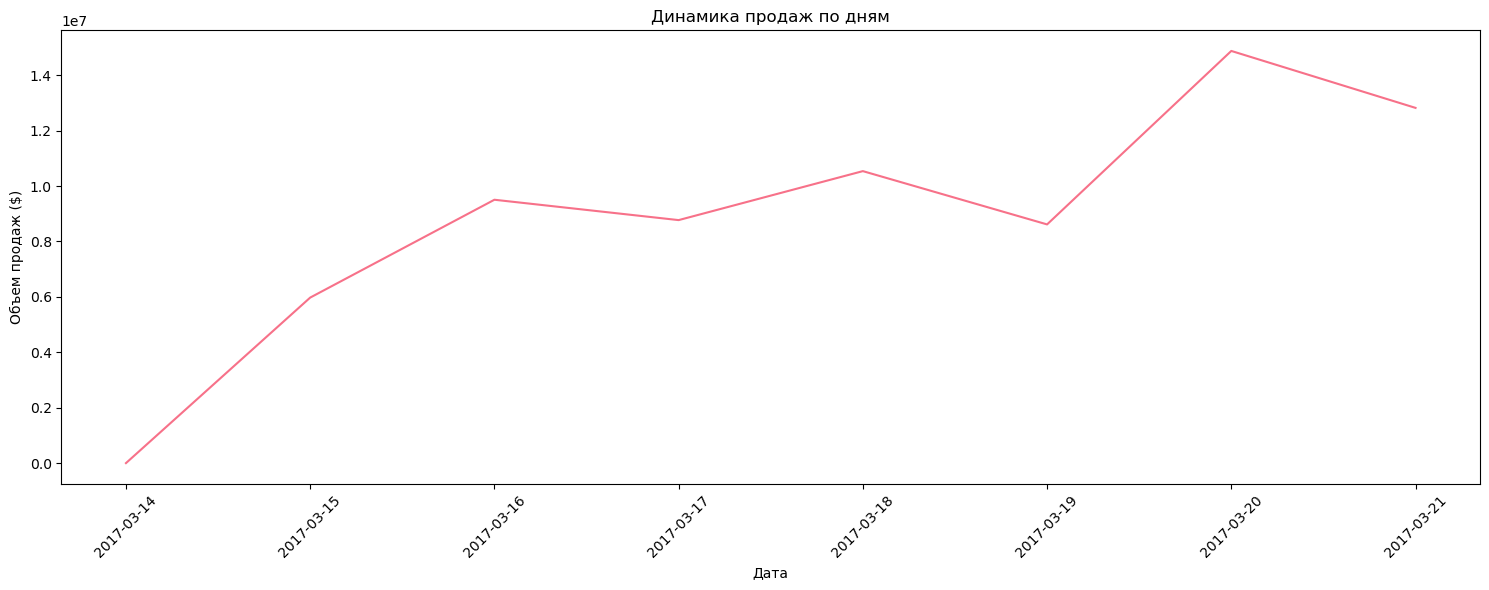

In [52]:
# 8. Временные паттерны (если есть данные о дате)
if 'accessed_date' in df.columns:
    df['accessed_date'] = pd.to_datetime(df['accessed_date'])
    daily_sales = df.groupby(df['accessed_date'].dt.date)['sales'].sum()

    plt.figure(figsize=(15, 6))
    plt.plot(daily_sales.index, daily_sales.values)
    plt.title('Динамика продаж по дням')
    plt.xlabel('Дата')
    plt.ylabel('Объем продаж ($)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

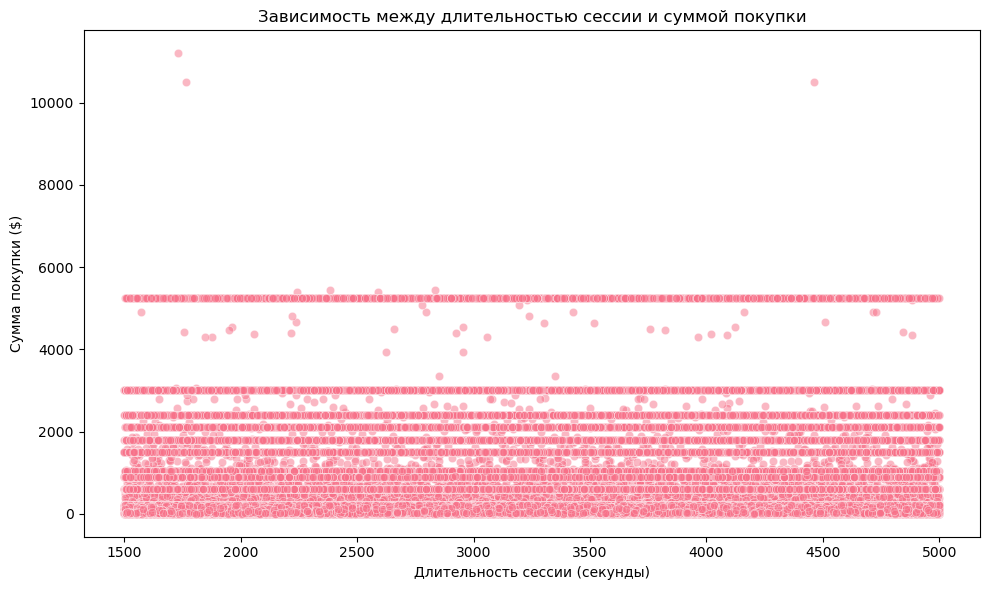

In [53]:
# 9. Корреляция между длительностью сессии и продажами
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df[df['sales'] > 0], x='duration_(secs)', y='sales', alpha=0.5)
plt.title('Зависимость между длительностью сессии и суммой покупки')
plt.xlabel('Длительность сессии (секунды)')
plt.ylabel('Сумма покупки ($)')
plt.tight_layout()
plt.show()

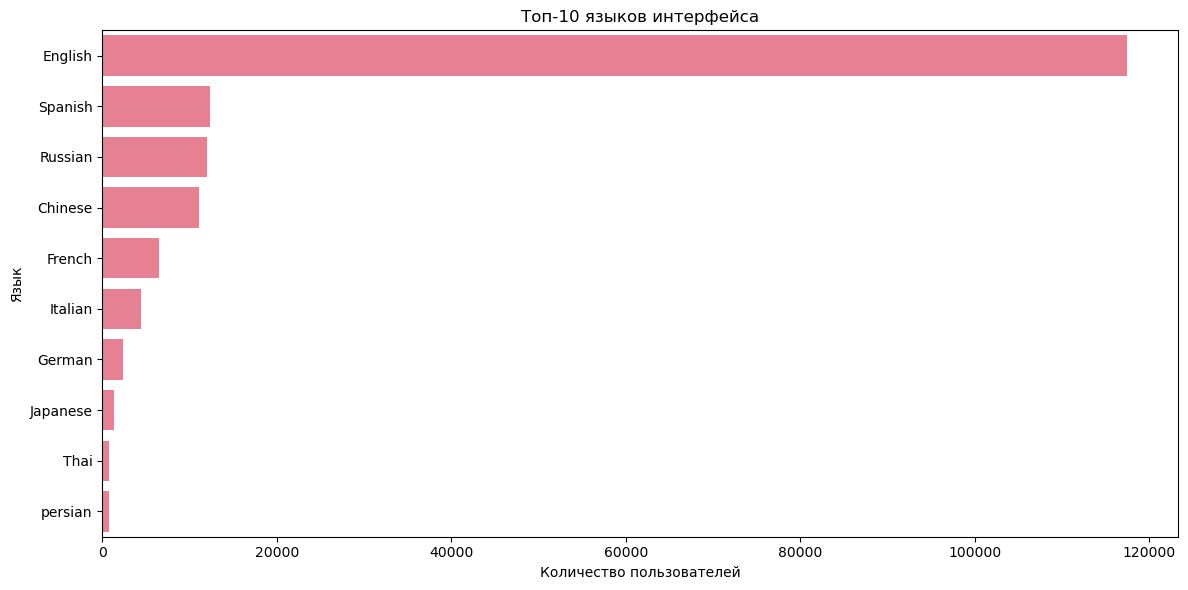

In [54]:
# 10. Распределение пользователей по языкам
plt.figure(figsize=(12, 6))
language_dist = df['language'].value_counts().head(10)
sns.barplot(x=language_dist.values, y=language_dist.index)
plt.title('Топ-10 языков интерфейса')
plt.xlabel('Количество пользователей')
plt.ylabel('Язык')
plt.tight_layout()
plt.show()

C:\Users\Павел\AppData\Local\Temp\ipykernel_22864\1687044069.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_vs_sales = age_data.groupby(pd.cut(age_data['age'], bins=5))['sales'].mean()


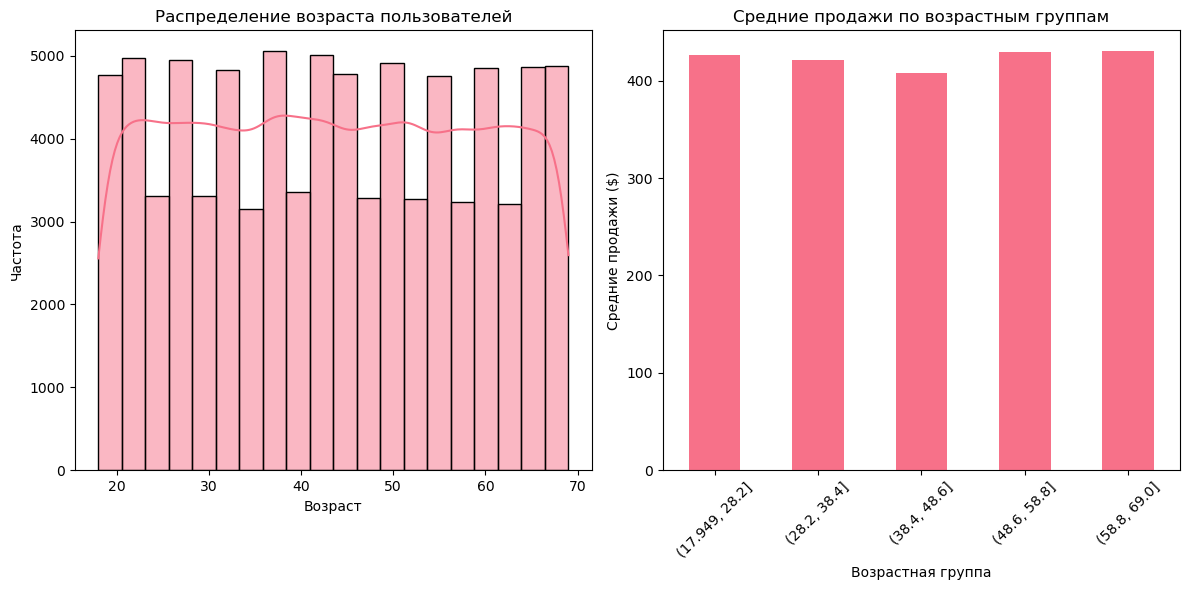

In [55]:
# 11. Анализ возраста (если данные доступны)
if 'age' in df.columns and df['age'].notna().sum() > 0:
    # Очистка данных возраста
    age_data = df[df['age'].notna()].copy()
    age_data['age'] = pd.to_numeric(age_data['age'], errors='coerce')
    age_data = age_data[age_data['age'].notna()]

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(age_data['age'], bins=20, kde=True)
    plt.title('Распределение возраста пользователей')
    plt.xlabel('Возраст')
    plt.ylabel('Частота')

    plt.subplot(1, 2, 2)
    age_vs_sales = age_data.groupby(pd.cut(age_data['age'], bins=5))['sales'].mean()
    age_vs_sales.plot(kind='bar')
    plt.title('Средние продажи по возрастным группам')
    plt.xlabel('Возрастная группа')
    plt.ylabel('Средние продажи ($)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

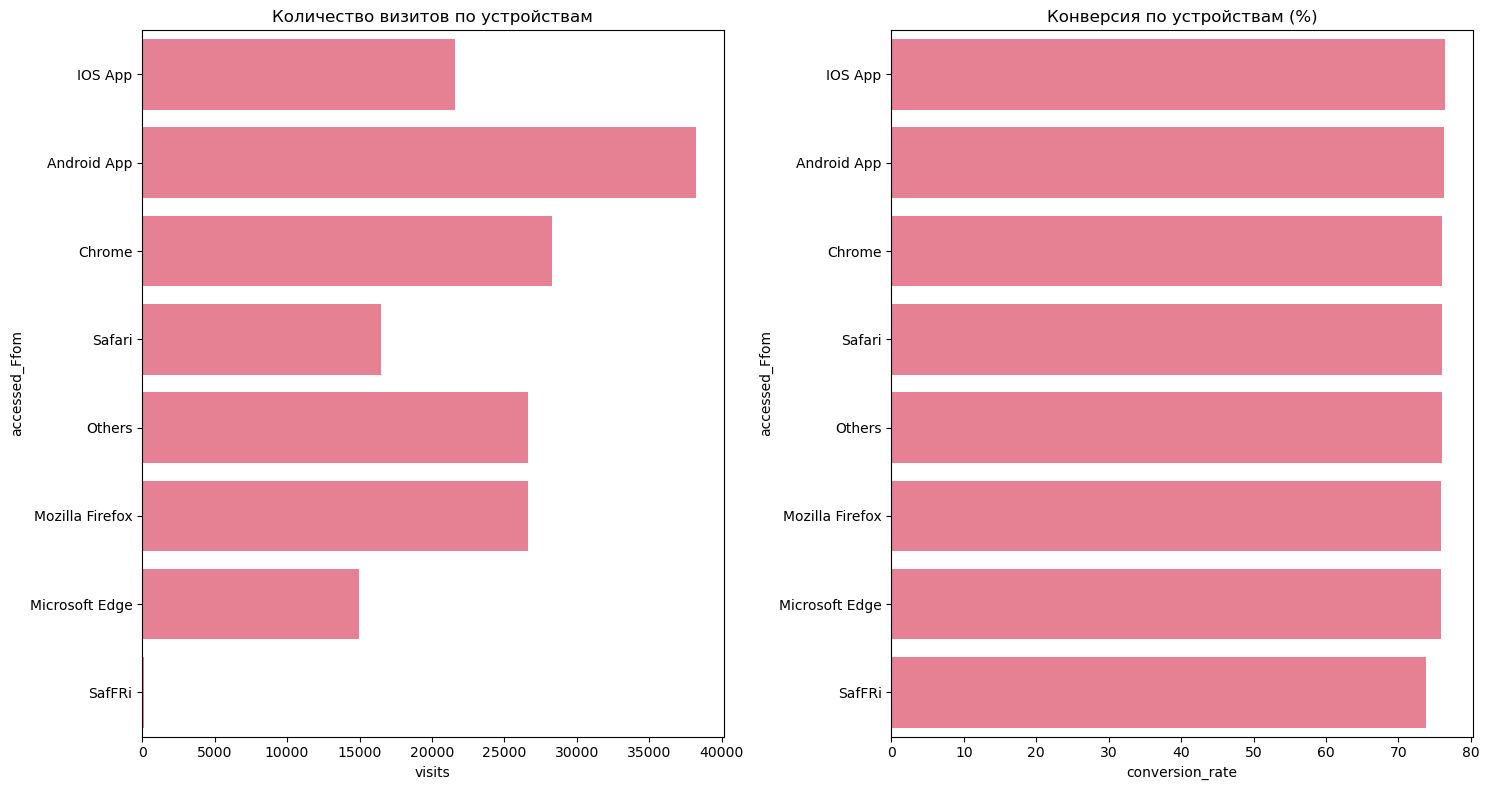

In [56]:
# 12. Анализ воронки продаж по устройствам
plt.figure(figsize=(15, 8))
funnel_data = df.groupby('accessed_Ffom').agg({
    'duration_(secs)': 'count',
    'sales': lambda x: (x > 0).sum()
}).rename(columns={'duration_(secs)': 'visits', 'sales': 'purchases'})
funnel_data['conversion_rate'] = (funnel_data['purchases'] / funnel_data['visits']) * 100

funnel_data = funnel_data.sort_values('conversion_rate', ascending=False)

plt.subplot(1, 2, 1)
sns.barplot(x=funnel_data['visits'], y=funnel_data.index)
plt.title('Количество визитов по устройствам')

plt.subplot(1, 2, 2)
sns.barplot(x=funnel_data['conversion_rate'], y=funnel_data.index)
plt.title('Конверсия по устройствам (%)')
plt.tight_layout()
plt.show()

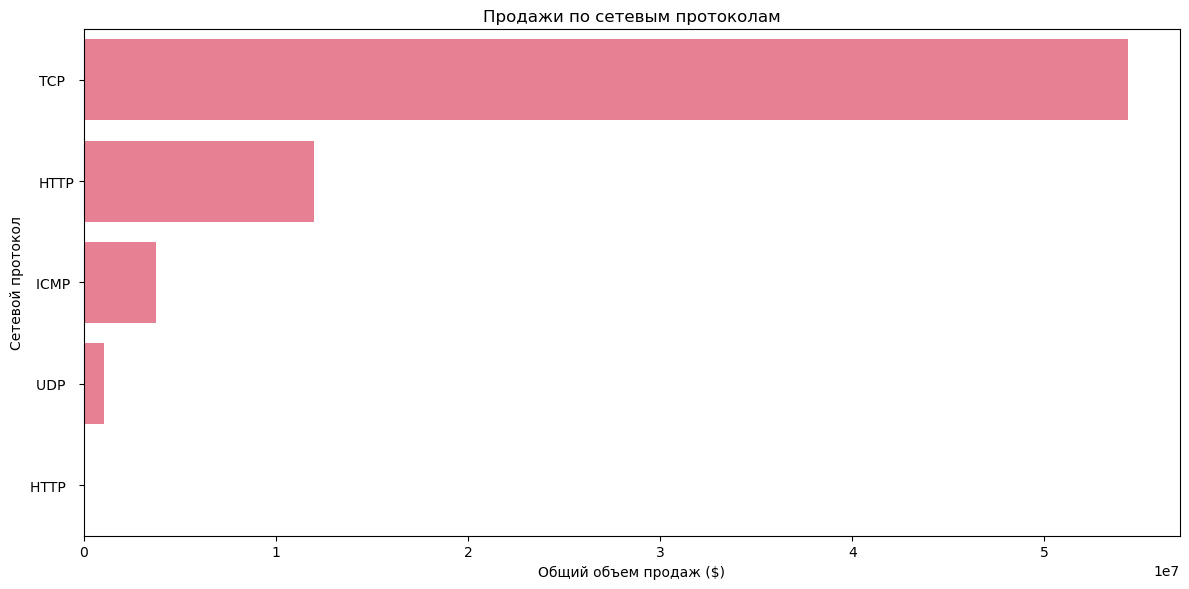

In [57]:
# 13. Анализ сетевых протоколов
plt.figure(figsize=(12, 6))
protocol_analysis = df.groupby('network_protocol').agg({
    'duration_(secs)': 'count',
    'sales': 'sum'
}).rename(columns={'duration_(secs)': 'sessions', 'sales': 'total_sales'})

protocol_analysis = protocol_analysis.sort_values('total_sales', ascending=False)

sns.barplot(x=protocol_analysis['total_sales'], y=protocol_analysis.index)
plt.title('Продажи по сетевым протоколам')
plt.xlabel('Общий объем продаж ($)')
plt.ylabel('Сетевой протокол')
plt.tight_layout()
plt.show()

ГИПОТЕЗА 1: Анализ возвратов по стоимости
Сравнение стоимости покупок и возвратов:
Средняя сумма покупки: 540.66
Медиана суммы покупки: 121.98
Средняя сумма возврата: 566.93
Медиана суммы возврата: 162.64

Анализ по ценовым корзинам:
              purchases_count  returns_count  return_rate
price_bucket                                             
0-50                    45899           7034    15.324953
50-100                  13570           2475    18.238762
100-250                 24138           3684    15.262242
250-500                  1829           2008   109.786769
500-1000                23109           2170     9.390281
1000-1500                1819           2845   156.404618
1500-3000               16873           1813    10.744977
3000-10000               4260            534    12.535211
10000+                      3              0     0.000000


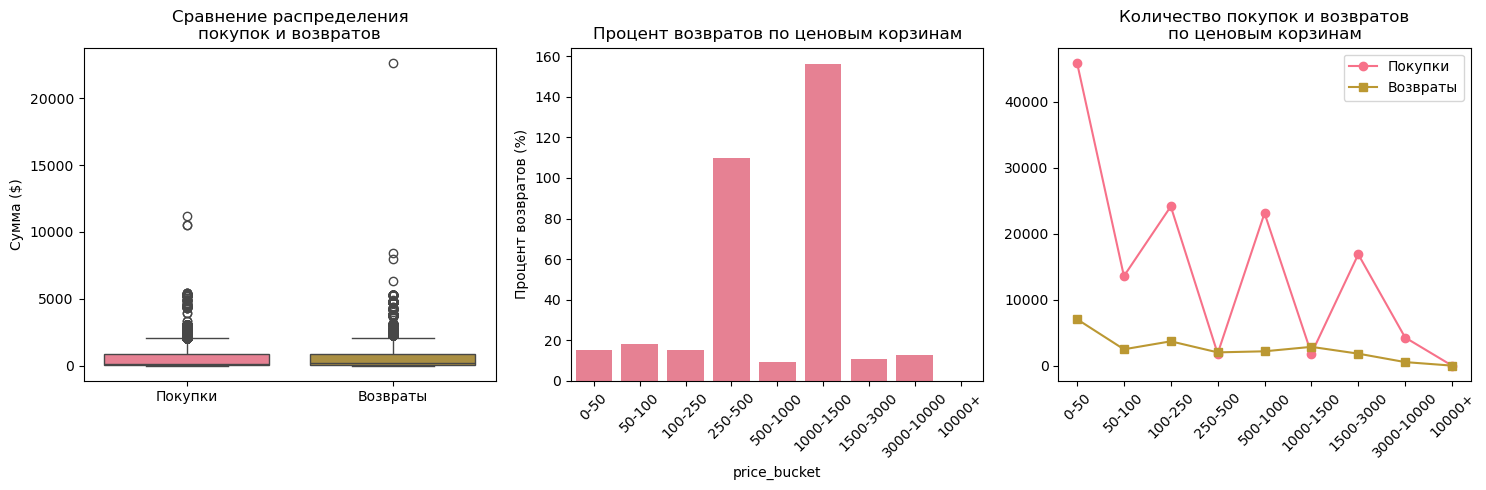

In [58]:
# H1. Возвраты — это в основном дорогие покупки или нет
print("=" * 60)
print("ГИПОТЕЗА 1: Анализ возвратов по стоимости")
print("=" * 60)

# Создаем отдельные датафреймы для покупок и возвратов
purchases = df[df['sales'] > 0].copy()
returns = df[df['returned'] == 'Yes'].copy()

# Анализ основных метрик
print("Сравнение стоимости покупок и возвратов:")
print(f"Средняя сумма покупки: {purchases['sales'].mean():.2f}")
print(f"Медиана суммы покупки: {purchases['sales'].median():.2f}")
print(f"Средняя сумма возврата: {returns['returned_amount'].mean():.2f}")
print(f"Медиана суммы возврата: {returns['returned_amount'].median():.2f}")

# Анализ по ценовым корзинам
def analyze_price_buckets(purchases_df, returns_df):
    # Создаем ценовые корзины
    bins = [0, 50, 100, 250, 500, 1000, 1500, 3000, 10000, 20000]
    labels = ['0-50', '50-100', '100-250', '250-500', '500-1000',
              '1000-1500', '1500-3000', '3000-10000', '10000+']

    purchases_df['price_bucket'] = pd.cut(purchases_df['sales'], bins=bins, labels=labels)
    returns_df['price_bucket'] = pd.cut(returns_df['returned_amount'], bins=bins, labels=labels)

    # Считаем распределение
    purchase_dist = purchases_df['price_bucket'].value_counts().sort_index()
    return_dist = returns_df['price_bucket'].value_counts().sort_index()

    # Считаем процент возвратов по корзинам
    result_df = pd.DataFrame({
        'purchases_count': purchase_dist,
        'returns_count': return_dist,
        'return_rate': (return_dist / purchase_dist * 100).fillna(0)
    })

    return result_df

price_analysis = analyze_price_buckets(purchases, returns)
print("\nАнализ по ценовым корзинам:")
print(price_analysis)

# Визуализация H1
plt.figure(figsize=(15, 5))

# График 1: Сравнение распределений
plt.subplot(1, 3, 1)
sns.boxplot(data=[purchases['sales'], returns['returned_amount']])
plt.title('Сравнение распределения\nпокупок и возвратов')
plt.xticks([0, 1], ['Покупки', 'Возвраты'])
plt.ylabel('Сумма ($)')

# График 2: Процент возвратов по ценовым корзинам
plt.subplot(1, 3, 2)
sns.barplot(x=price_analysis.index, y=price_analysis['return_rate'])
plt.title('Процент возвратов по ценовым корзинам')
plt.xticks(rotation=45)
plt.ylabel('Процент возвратов (%)')

# График 3: Количество покупок и возвратов по корзинам
plt.subplot(1, 3, 3)
plt.plot(price_analysis.index, price_analysis['purchases_count'], label='Покупки', marker='o')
plt.plot(price_analysis.index, price_analysis['returns_count'], label='Возвраты', marker='s')
plt.title('Количество покупок и возвратов\nпо ценовым корзинам')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


ГИПОТЕЗА 2: Анализ стран по объему продаж и среднему чеку
Топ-15 стран по объему заказов:
         orders_count      revenue  avg_order_value  rank_difference
country                                                             
IT              26159  14091142.13           538.67            -15.0
US              23165  12603800.14           544.09             -8.0
CA              13441   7314591.08           544.20             -6.0
CN               7765   4168090.38           536.78            -13.0
JP               7533   4178975.92           554.76             -1.0
RU               7242   3841295.75           530.42            -15.0
CH               6258   3298889.12           527.15            -16.0
IN               6136   3314236.69           540.13             -5.0
PL               5145   2894627.94           562.61              6.0
GB               3754   2011572.95           535.85             -8.0
AT               3608   1994025.62           552.67              4.0
AU          

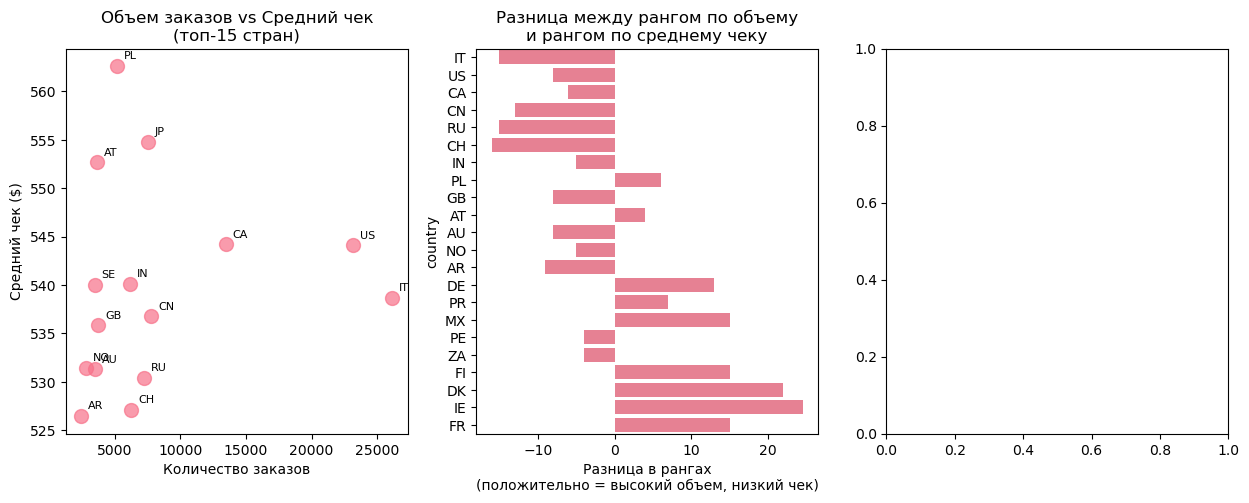

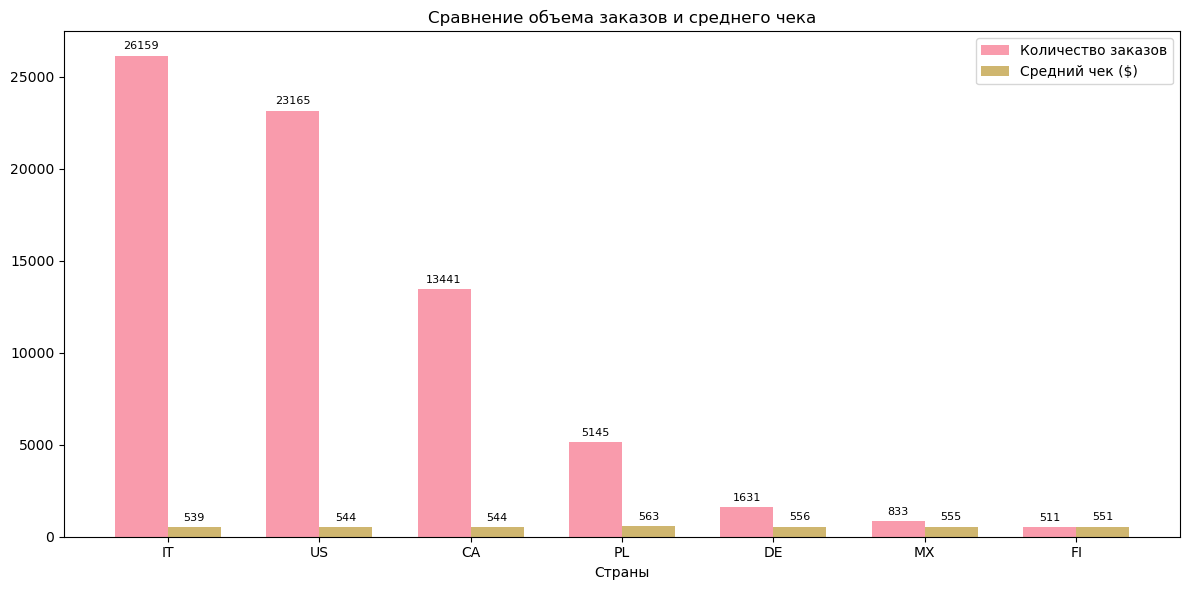

In [59]:
# H2. Высокий объём продаж это не показатель большого среднего чека
print("\n" + "=" * 60)
print("ГИПОТЕЗА 2: Анализ стран по объему продаж и среднему чеку")
print("=" * 60)

# Анализ по странам
country_analysis = purchases.groupby('country').agg({
    'sales': ['count', 'sum', 'mean'],
    'duration_(secs)': 'mean'
}).round(2)

country_analysis.columns = ['orders_count', 'revenue', 'avg_order_value', 'avg_session_duration']
country_analysis = country_analysis.sort_values('orders_count', ascending=False)

# Добавляем ранги
country_analysis['rank_orders'] = country_analysis['orders_count'].rank(ascending=False)
country_analysis['rank_avg_value'] = country_analysis['avg_order_value'].rank(ascending=False)
country_analysis['rank_difference'] = country_analysis['rank_orders'] - country_analysis['rank_avg_value']

print("Топ-15 стран по объему заказов:")
print(country_analysis.head(15)[['orders_count', 'revenue', 'avg_order_value', 'rank_difference']])

# Страны с наибольшими расхождениями в рангах
high_volume_low_avg = country_analysis[country_analysis['rank_difference'] > 5].head(10)
low_volume_high_avg = country_analysis[country_analysis['rank_difference'] < -5].head(10)

print("\nСтраны с высоким объемом, но низким средним чеком:")
print(high_volume_low_avg[['orders_count', 'avg_order_value', 'rank_difference']])

print("\nСтраны с низким объемом, но высоким средним чеком:")
print(low_volume_high_avg[['orders_count', 'avg_order_value', 'rank_difference']])

# Визуализация H2
plt.figure(figsize=(15, 5))

# График 1: Объем заказов vs Средний чек
plt.subplot(1, 3, 1)
top_countries = country_analysis.head(15)
plt.scatter(top_countries['orders_count'], top_countries['avg_order_value'], s=100, alpha=0.7)
for country in top_countries.index:
    plt.annotate(country,
                (top_countries.loc[country, 'orders_count'],
                 top_countries.loc[country, 'avg_order_value']),
                xytext=(5, 5), textcoords='offset points', fontsize=8)
plt.xlabel('Количество заказов')
plt.ylabel('Средний чек ($)')
plt.title('Объем заказов vs Средний чек\n(топ-15 стран)')

# График 2: Разница в рангах
plt.subplot(1, 3, 2)
significant_diff = country_analysis[abs(country_analysis['rank_difference']) > 3]
sns.barplot(y=significant_diff.index, x=significant_diff['rank_difference'])
plt.title('Разница между рангом по объему\nи рангом по среднему чеку')
plt.xlabel('Разница в рангах\n(положительно = высокий объем, низкий чек)')

# График 3: Сравнение Италии с другими странами
plt.subplot(1, 3, 3)
comparison_countries = ['IT', 'US', 'CA', 'PL', 'DE', 'MX', 'FI']
comparison_data = country_analysis.loc[comparison_countries]
comparison_data = comparison_data.reset_index()

x = np.arange(len(comparison_data))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, comparison_data['orders_count'], width, label='Количество заказов', alpha=0.7)
bars2 = ax.bar(x + width/2, comparison_data['avg_order_value'], width, label='Средний чек ($)', alpha=0.7)

ax.set_xlabel('Страны')
ax.set_title('Сравнение объема заказов и среднего чека')
ax.set_xticks(x)
ax.set_xticklabels(comparison_data['country'])
ax.legend()

# Добавляем значения на столбцы
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.0f}',
                   xy=(bar.get_x() + bar.get_width() / 2, height),
                   xytext=(0, 3),
                   textcoords="offset points",
                   ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


ГИПОТЕЗА 3: Анализ языковых предпочтений
Топ-10 языков интерфейса (все сессии):
language
English     117437
Spanish      12339
Russian      12008
Chinese      11112
French        6492
Italian       4425
German        2366
Japanese      1358
Thai           825
persian        806
Name: count, dtype: int64

Топ-10 языков интерфейса (только покупки):
language
English     88502
Spanish      9886
Russian      9269
Chinese      9242
French       5049
Italian      2760
German       1818
Japanese      973
Thai          613
persian       592
Name: count, dtype: int64

Языки интерфейса в Италии (все сессии):
language
English     23363
Spanish      2457
Russian      2411
Chinese      2219
French       1342
Italian       884
German        454
Japanese      270
Thai          159
persian       151
Name: count, dtype: int64

Языки интерфейса в Италии (только покупки):
language
English     17584
Spanish      1966
Chinese      1860
Russian      1852
French       1044
Italian       551
German        341

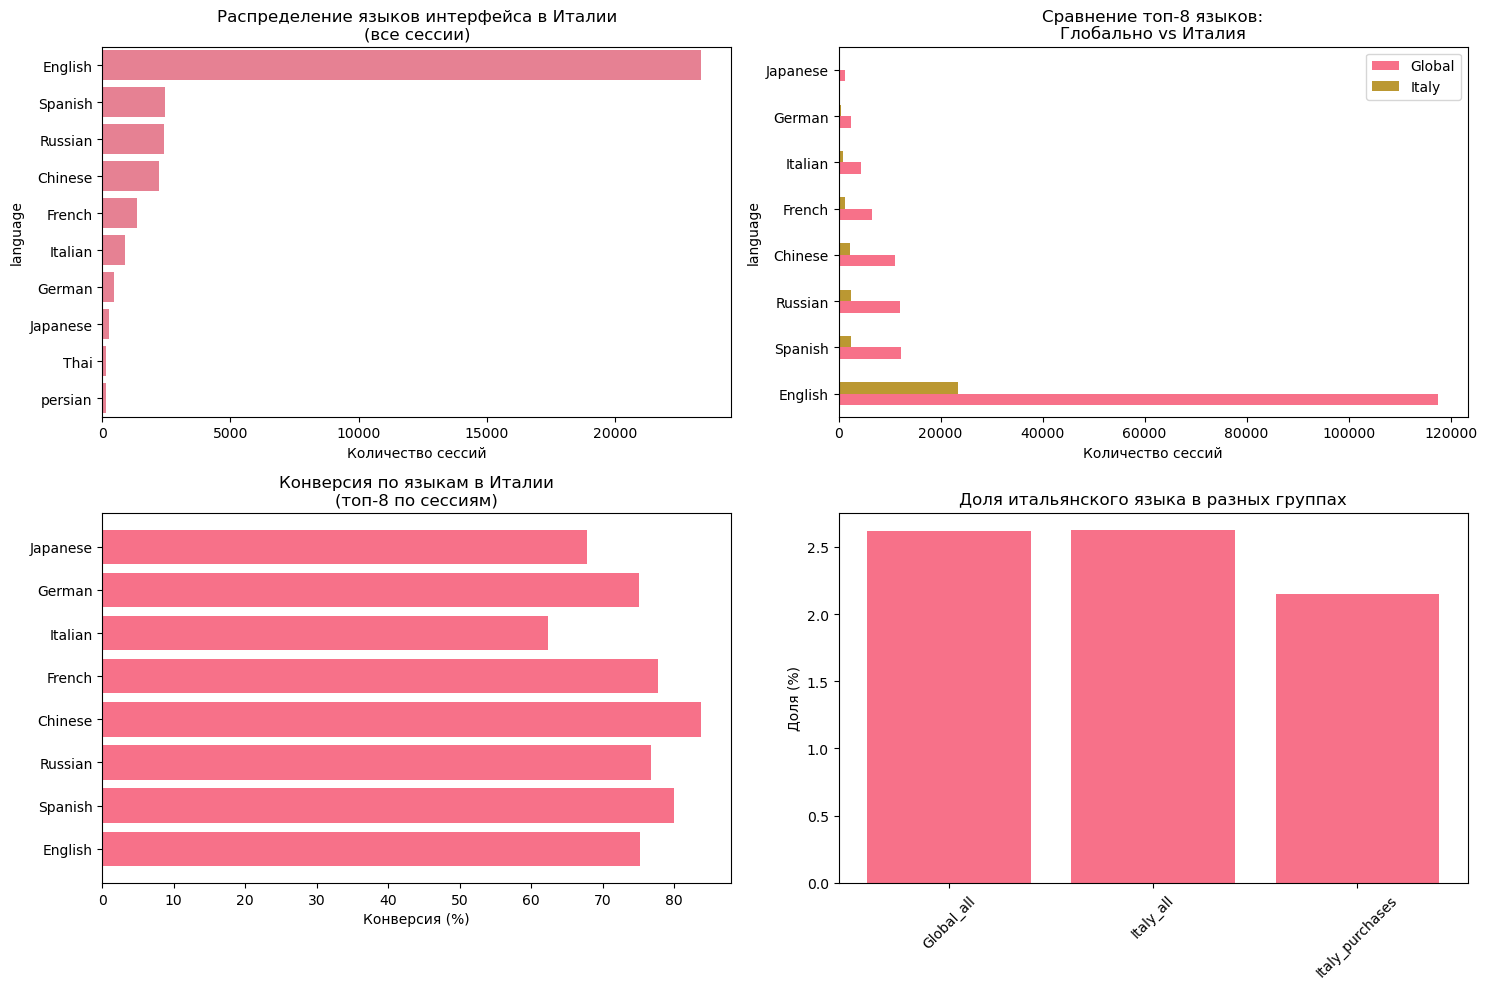


ДОПОЛНИТЕЛЬНЫЙ АНАЛИЗ: Демография пользователей из Италии
Демографические характеристики по языкам в Италии:
            gender  age_numeric membership  duration_(secs)
language                                                   
Arabic      Female        43.68    Premium          3158.63
Chinese     Female        43.56    Premium          3280.65
Dutch       Female        42.56    Premium          3296.72
English     Female        43.33    Premium          3237.38
French      Female        44.20    Premium          3241.05
German      Female        43.75    Premium          3247.25
Italian     Female        42.57    Premium          3285.31
Japanese    Female        41.79    Premium          3207.53
Portuguese  Female        44.94    Premium          3176.04
Russian     Female        44.08    Premium          3235.85

Анализ возвратов по языкам (дополнительно):
            returned_amount  duration_(secs)  age_numeric
language                                                 
Arabic   

In [60]:
# H3. Почему Италия лидирует по продажам, а итальянский язык не в топ‑5
print("\n" + "=" * 60)
print("ГИПОТЕЗА 3: Анализ языковых предпочтений")
print("=" * 60)

# Анализ языков в целом
language_overall = df['language'].value_counts().head(10)
language_purchases = purchases['language'].value_counts().head(10)

print("Топ-10 языков интерфейса (все сессии):")
print(language_overall)
print("\nТоп-10 языков интерфейса (только покупки):")
print(language_purchases)

# Анализ языков в Италии
italy_sessions = df[df['country'] == 'IT']
italy_purchases = purchases[purchases['country'] == 'IT']

italy_language_sessions = italy_sessions['language'].value_counts().head(10)
italy_language_purchases = italy_purchases['language'].value_counts().head(10)

print("\nЯзыки интерфейса в Италии (все сессии):")
print(italy_language_sessions)
print("\nЯзыки интерфейса в Италии (только покупки):")
print(italy_language_purchases)

# Анализ конверсии по языкам в Италии
italy_conversion_by_language = italy_sessions.groupby('language').agg({
    'sales': ['count', lambda x: (x > 0).sum()]
}).round(2)
italy_conversion_by_language.columns = ['sessions', 'purchases']
italy_conversion_by_language['conversion_rate'] = (italy_conversion_by_language['purchases'] /
                                                  italy_conversion_by_language['sessions'] * 100).round(2)
italy_conversion_by_language = italy_conversion_by_language.sort_values('sessions', ascending=False)

print("\nКонверсия по языкам в Италии:")
print(italy_conversion_by_language.head(10))

# Анализ возвратов по языкам в Италии
italy_returns_by_language = italy_sessions[italy_sessions['returned'] == 'Yes']['language'].value_counts()
print("\nВозвраты по языкам в Италии:")
print(italy_returns_by_language.head(10))

# Визуализация H3
plt.figure(figsize=(15, 10))

# График 1: Языки интерфейса в Италии
plt.subplot(2, 2, 1)
sns.barplot(x=italy_language_sessions.values, y=italy_language_sessions.index)
plt.title('Распределение языков интерфейса в Италии\n(все сессии)')
plt.xlabel('Количество сессий')

# График 2: Сравнение общего и итальянского распределения языков
plt.subplot(2, 2, 2)
top_languages_comparison = pd.DataFrame({
    'Global': language_overall.head(8),
    'Italy': italy_language_sessions.head(8)
}).fillna(0)

top_languages_comparison.plot(kind='barh', ax=plt.gca())
plt.title('Сравнение топ-8 языков:\nГлобально vs Италия')
plt.xlabel('Количество сессий')
plt.legend()

# График 3: Конверсия по языкам в Италии
plt.subplot(2, 2, 3)
top_italy_conv = italy_conversion_by_language.head(8)
plt.barh(top_italy_conv.index, top_italy_conv['conversion_rate'])
plt.title('Конверсия по языкам в Италии\n(топ-8 по сессиям)')
plt.xlabel('Конверсия (%)')

# График 4: Доля итальянского языка
plt.subplot(2, 2, 4)
italian_language_share = {
    'Global_all': (language_overall.get('Italian', 0) / language_overall.sum() * 100),
    'Italy_all': (italy_language_sessions.get('Italian', 0) / italy_language_sessions.sum() * 100),
    'Italy_purchases': (italy_language_purchases.get('Italian', 0) / italy_language_purchases.sum() * 100)
}

plt.bar(italian_language_share.keys(), italian_language_share.values())
plt.title('Доля итальянского языка в разных группах')
plt.xticks(rotation=45)
plt.ylabel('Доля (%)')

plt.tight_layout()
plt.show()

# Дополнительный анализ: демография пользователей из Италии
print("\n" + "=" * 60)
print("ДОПОЛНИТЕЛЬНЫЙ АНАЛИЗ: Демография пользователей из Италии")
print("=" * 60)

# Исправляем проблему с колонкой age - преобразуем в числовой формат, где возможно
italy_sessions_fixed = italy_sessions.copy()
italy_sessions_fixed['age_numeric'] = pd.to_numeric(italy_sessions_fixed['age'], errors='coerce')

italy_demographics = italy_sessions_fixed.groupby('language').agg({
    'gender': lambda x: x.mode()[0] if len(x.mode()) > 0 else 'Unknown',
    'age_numeric': 'mean',
    'membership': lambda x: x.mode()[0] if len(x.mode()) > 0 else 'Unknown',
    'duration_(secs)': 'mean'
}).round(2)

print("Демографические характеристики по языкам в Италии:")
print(italy_demographics.head(10))

# Анализ возвратов по языкам с дополнительной информацией
print("\nАнализ возвратов по языкам (дополнительно):")
italy_returns_analysis = italy_sessions_fixed[italy_sessions_fixed['returned'] == 'Yes'].groupby('language').agg({
    'returned_amount': 'mean',
    'duration_(secs)': 'mean',
    'age_numeric': 'mean'
}).round(2)

print(italy_returns_analysis.head(10))

Построение ML-моделей (Паша)

In [ ]:
# базовая дата и время
df['accessed_date'] = pd.to_datetime(df['accessed_date'])

df['hour'] = df['accessed_date'].dt.hour
df['day_of_week'] = df['accessed_date'].dt.dayofweek

# длина сессии в минутах
df['duration_min'] = df['duration_(secs)'] / 60.0

# флаг: была ли покупка
df['purchased'] = df['sales'] > 0

# флаг: был ли возврат
df['is_returned'] = df['returned'].apply(lambda x: 1 if x == 'Yes' else 0)

# категориальные переменные
cat_columns = ['gender', 'country', 'language', 'membership',
               'pay_method', 'accessed_Ffom', 'network_protocol', 'ip']
df[cat_columns] = df[cat_columns].astype('category')

# чек по возрасту 
df['age_bucket'] = pd.cut(df['age_clean'], bins=[0, 18, 25, 35, 50, 65, 100],
                          labels=['<18', '18-25', '26-35', '36-50', '51-65', '65+'])

df['age_bucket'] = df['age_bucket'].astype('category')

In [ ]:
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.model_selection import train_test_split

# целевой столбец
target = 'purchased'

# выкидываем ненужные апризнаки
drop_cols = ['accessed_date', 'returned', 'returned_amount', 'sales',
             'is_returned', 'age', 'age_numeric', 'age_clean', 'ip'] 

# все фичи
features = [col for col in df.columns if col not in drop_cols + [target]]

# категориальные признаки
cat_features = df[features].select_dtypes(['category']).columns.tolist()

X = df[features]
y = df[target]

In [63]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

In [64]:
model_p2b = CatBoostClassifier(
    iterations=300,
    learning_rate=0.05,
    depth=6,
    eval_metric='AUC',
    random_seed=42,
    verbose=50
)

model_p2b.fit(X_train, y_train, cat_features=cat_features, eval_set=(X_test, y_test))
model_p2b.save_model('p2b_model.cbm')

0:	test: 0.7097872	best: 0.7097872 (0)	total: 310ms	remaining: 1m 32s
50:	test: 0.7228244	best: 0.7229985 (46)	total: 7.01s	remaining: 34.2s
100:	test: 0.7249342	best: 0.7249342 (100)	total: 14.5s	remaining: 28.6s
150:	test: 0.7249105	best: 0.7250835 (124)	total: 22.1s	remaining: 21.8s
200:	test: 0.7246296	best: 0.7250835 (124)	total: 29.9s	remaining: 14.7s
250:	test: 0.7248551	best: 0.7251408 (233)	total: 37.6s	remaining: 7.35s
299:	test: 0.7246080	best: 0.7251408 (233)	total: 45.6s	remaining: 0us

bestTest = 0.7251407521
bestIteration = 233

Shrink model to first 234 iterations.


In [65]:
y_pred_proba = model_p2b.predict_proba(X_test)[:, 1]
y_pred = model_p2b.predict(X_test)

print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))
print(classification_report(y_test, y_pred))

ROC AUC Score: 0.7251407521048672
              precision    recall  f1-score   support

       False       1.00      0.38      0.56     10335
        True       0.84      1.00      0.91     32875

    accuracy                           0.85     43210
   macro avg       0.92      0.69      0.73     43210
weighted avg       0.88      0.85      0.83     43210



In [66]:
target = 'is_returned'

In [ ]:
features = [col for col in df.columns if col not in drop_cols + [target]]
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

In [68]:
model_r2r = CatBoostClassifier(
    iterations=300,
    learning_rate=0.05,
    depth=6,
    eval_metric='AUC',
    random_seed=42,
    verbose=50
)
model_r2r.fit(X_train, y_train, cat_features=cat_features, eval_set=(X_test, y_test))
model_r2r.save_model('r2r_model.cbm')

0:	test: 0.9980900	best: 0.9980900 (0)	total: 182ms	remaining: 54.5s
50:	test: 0.9998644	best: 0.9998644 (50)	total: 8.32s	remaining: 40.6s
100:	test: 0.9998672	best: 0.9998691 (96)	total: 14.5s	remaining: 28.6s
150:	test: 0.9998770	best: 0.9998770 (144)	total: 20.9s	remaining: 20.6s
200:	test: 0.9999013	best: 0.9999013 (200)	total: 27.9s	remaining: 13.7s
250:	test: 0.9999076	best: 0.9999076 (241)	total: 34.4s	remaining: 6.72s
299:	test: 0.9999176	best: 0.9999176 (298)	total: 40.9s	remaining: 0us

bestTest = 0.9999175658
bestIteration = 298

Shrink model to first 299 iterations.


In [69]:
from sklearn.metrics import roc_auc_score, classification_report

y_pred_proba = model_r2r.predict_proba(X_test)[:, 1]
y_pred = model_r2r.predict(X_test)

print("ROC AUC Score (R2R):", roc_auc_score(y_test, y_pred_proba))
print(classification_report(y_test, y_pred))

ROC AUC Score (R2R): 0.9999175658489025
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37569
           1       0.99      1.00      0.99      5641

    accuracy                           1.00     43210
   macro avg       1.00      1.00      1.00     43210
weighted avg       1.00      1.00      1.00     43210



In [ ]:
import pandas as pd

def preprocess_input(data: dict) -> pd.DataFrame:
    df = pd.DataFrame([data]) 

    # дата и время
    df['accessed_date'] = pd.to_datetime(df['accessed_date'])
    df['hour'] = df['accessed_date'].dt.hour
    df['day_of_week'] = df['accessed_date'].dt.dayofweek

    # длительность
    df['duration_min'] = df['duration_(secs)'] / 60.0

    # вспомогательные поля
    df['purchased'] = False
    df['is_returned'] = 0

    # возрастной сегмент
    df['age_bucket'] = pd.cut(
        df['age_clean'],
        bins=[0, 18, 25, 35, 50, 65, 100],
        labels=['<18', '18-25', '26-35', '36-50', '51-65', '65+'])

    for col in cat_features:
        if col in df.columns:
            df[col] = df[col].astype(str)

    return df
from catboost import Pool

def score_session(input_data: dict):
    df = preprocess_input(input_data)

    # нужные признаки
    df_model = df[features]

    pool = Pool(data=df_model, cat_features=cat_features)

    #   предсказания
    p2b = float(model_p2b.predict_proba(pool)[0][1])
    r2r = float(model_r2r.predict_proba(pool)[0][1])

    return {'p2b': p2b, 'r2r': r2r}

In [71]:
example_session = {
    'accessed_date': '2023-10-01 14:30:00',
    'duration_(secs)': 1200,
    'gender': 'Male',
    'country': 'Russia',
    'language': 'RU',
    'membership': 'Premium',
    'pay_method': 'Card',
    'accessed_Ffom': 'Mobile',
    'network_protocol': 'TCP',
    'age_clean': 32,
    'bytes': 0
}
result = score_session(example_session)
print(result)

{'p2b': 0.8475915289927135, 'r2r': 0.9989548419509495}


In [ ]:
import numpy as np
import random

# копия
df_test = df.copy()


# рандомим группы
np.random.seed(42)
df_test['ab_group'] = np.random.choice(['A', 'B'], size=len(df_test))


def predict_scores(row):
    input_data = {
        'accessed_date': row['accessed_date'],
        'duration_(secs)': row['duration_(secs)'],
        'gender': row['gender'],
        'country': row['country'],
        'language': row['language'],
        'membership': row['membership'],
        'pay_method': row['pay_method'],
        'accessed_Ffom': row['accessed_Ffom'],
        'network_protocol': row['network_protocol'],
        'age_clean': row['age_clean'],
        'bytes': row['bytes']
    }
    try:
        result = score_session(input_data)
        return pd.Series({'p2b_score': result['p2b'], 'r2r_score': result['r2r']})
    except:
        return pd.Series({'p2b_score': np.nan, 'r2r_score': np.nan})

df_test[['p2b_score', 'r2r_score']] = df_test.apply(predict_scores, axis=1)

df_test['p2b_score'].fillna(0.5, inplace=True)
df_test['r2r_score'].fillna(0.5, inplace=True)

def assign_intervention(group, p2b, r2r):
    if group == 'A':
        return 'control'
    if p2b > 0.8 and r2r < 0.3:
        return 'show_discount'
    elif p2b < 0.5 and r2r > 0.7:
        return 'no_offer'
    else:
        return 'default'

df_test['intervention'] = df_test.apply(lambda row: assign_intervention(row['ab_group'], row['p2b_score'], row['r2r_score']), axis=1)

df_test['net_revenue'] = df_test['sales'] - df_test['returned_amount']

ab_summary = df_test.groupby('ab_group').agg(
    users=('user_id', 'count') if 'user_id' in df_test.columns else ('membership', 'count'),
    total_revenue=('sales', 'sum'),
    total_refunds=('returned_amount', 'sum'),
    net_revenue=('net_revenue', 'sum'),
    conversion_rate=('purchased', 'mean'),
    avg_p2b=('p2b_score', 'mean'),
    avg_r2r=('r2r_score', 'mean')
).round(2)

print("\nРезультаты A/B теста:")
print(ab_summary)

C:\Users\Павел\AppData\Local\Temp\ipykernel_22864\3866647602.py:41: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['p2b_score'].fillna(0.5, inplace=True)
C:\Users\Павел\AppData\Local\Temp\ipykernel_22864\3866647602.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa


📊 Результаты A/B теста:
          users  total_revenue  total_refunds  net_revenue  conversion_rate  \
ab_group                                                                      
A         86366    35512400.69     6375906.95  29136493.74             0.76   
B         86472    35583896.82     6416195.07  29167701.76             0.76   

          avg_p2b  avg_r2r  
ab_group                    
A            0.76     0.81  
B            0.76     0.81  


Прирост прибыли на 30к есть, но по моему это немного

In [73]:
df_test.head()

,accessed_date,duration_(secs),network_protocol,ip,bytes,accessed_Ffom,age,gender,country,membership,...,day_of_week,duration_min,purchased,is_returned,age_bucket,ab_group,p2b_score,r2r_score,intervention,net_revenue
0,2017-03-14 17:43:57.172,2533,TCP,1.10.195.126,20100,Chrome,28,Female,CA,Normal,...,1,42.216667,True,0,26-35,A,0.826291,0.025926,control,261.9600
1,2017-03-14 17:43:57.172,4034,TCP,1.1.217.211,20500,Mozilla Firefox,21,Male,AR,Normal,...,1,67.233333,True,0,18-25,B,0.821010,0.024721,show_discount,731.9400
2,2017-03-14 17:43:26.135,1525,TCP,1.115.198.107,90100,Mozilla Firefox,20,Male,PL,Normal,...,1,25.416667,True,0,18-25,A,0.832682,0.026525,control,14.6200
3,2017-03-14 17:43:26.135,4572,TCP,1.121.152.143,100300,Mozilla Firefox,66,Female,IN,Normal,...,1,76.200000,True,0,65+,A,0.837269,0.026261,control,957.5775
4,2017-03-14 18:17:09.005,3652,TCP,1.123.135.213,270200,Mozilla Firefox,53,Female,KR,Normal,...,1,60.866667,True,0,51-65,A,0.837745,0.023731,control,22.3680


Графики, показывающие результаты моделей и A/B тестирования

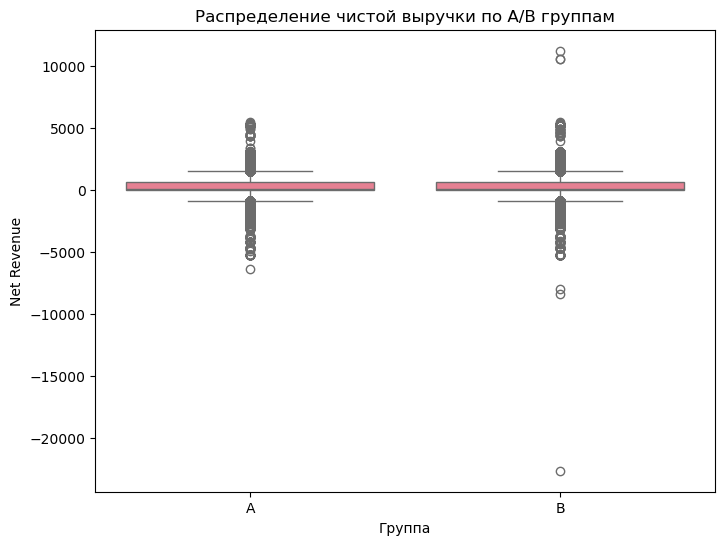

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='ab_group', y='net_revenue', data=df_test)
plt.title("Распределение чистой выручки по A/B группам")
plt.ylabel("Net Revenue")
plt.xlabel("Группа")
plt.show()

C:\Users\Павел\AppData\Local\Temp\ipykernel_22864\2818037714.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_test, x='hour', y='net_revenue', estimator='mean', ci=None)


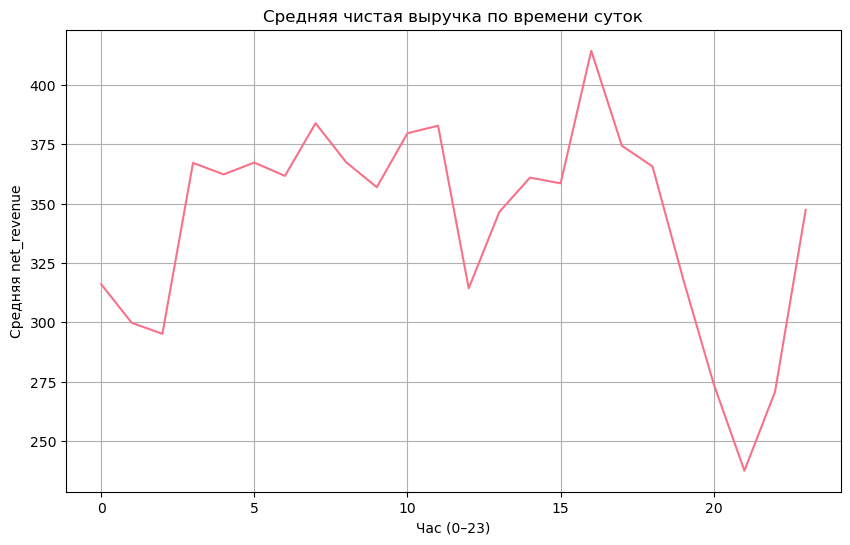

In [75]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_test, x='hour', y='net_revenue', estimator='mean', ci=None)
plt.title("Средняя чистая выручка по времени суток")
plt.xlabel("Час (0–23)")
plt.ylabel("Средняя net_revenue")
plt.grid(True)
plt.show()

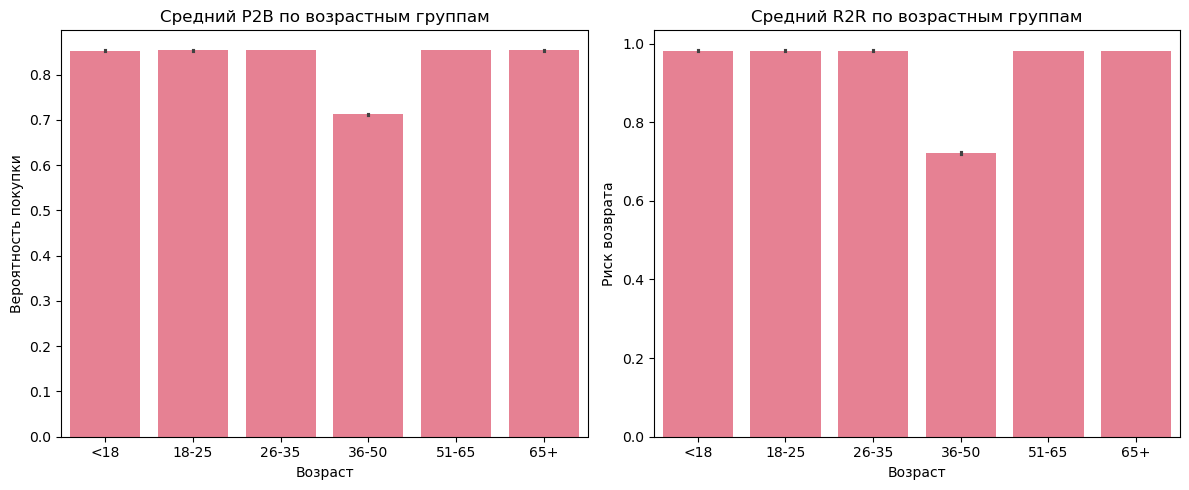

In [76]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(x='age_bucket', y='p2b_score', data=df_test)
plt.title("Средний P2B по возрастным группам")
plt.xlabel("Возраст")
plt.ylabel("Вероятность покупки")

plt.subplot(1, 2, 2)
sns.barplot(x='age_bucket', y='r2r_score', data=df_test)
plt.title("Средний R2R по возрастным группам")
plt.xlabel("Возраст")
plt.ylabel("Риск возврата")

plt.tight_layout()
plt.show()

C:\Users\Павел\AppData\Local\Temp\ipykernel_22864\2678647440.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='intervention', y='net_revenue', data=df_test, estimator=np.mean, ci=None)


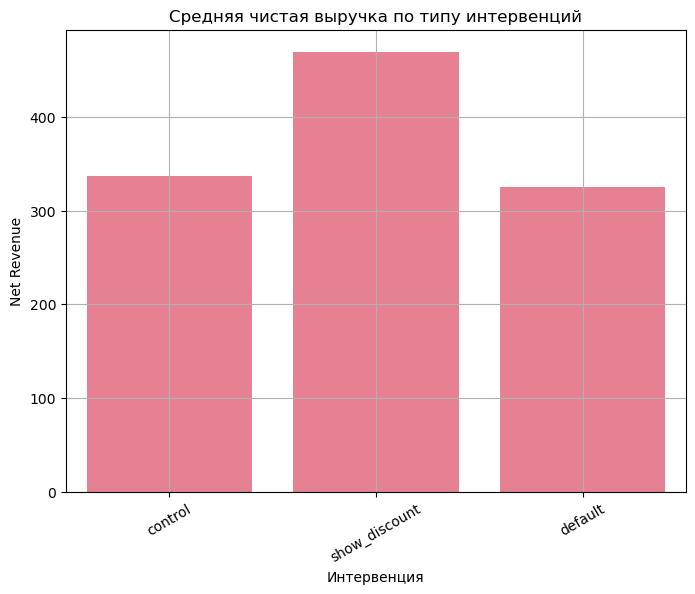

In [77]:
plt.figure(figsize=(8, 6))
sns.barplot(x='intervention', y='net_revenue', data=df_test, estimator=np.mean, ci=None)
plt.title("Средняя чистая выручка по типу интервенций")
plt.xlabel("Интервенция")
plt.ylabel("Net Revenue")
plt.xticks(rotation=30)
plt.grid(True)
plt.show()

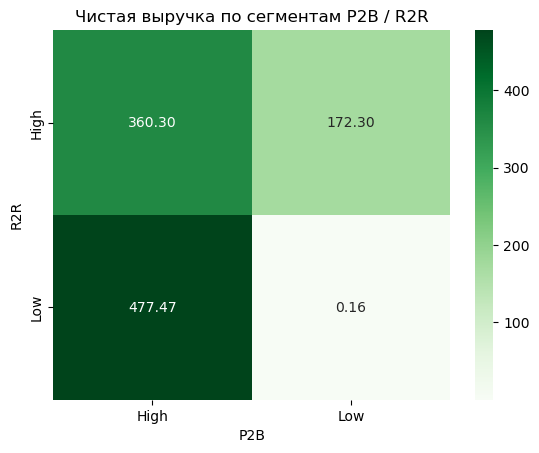

In [ ]:
def p2b_segment(p):
    return 'High' if p > 0.8 else 'Low'

def r2r_segment(r):
    return 'High' if r > 0.7 else 'Low'

df_test['seg_p2b'] = df_test['p2b_score'].apply(p2b_segment)
df_test['seg_r2r'] = df_test['r2r_score'].apply(r2r_segment)

pivot = df_test.pivot_table(
    index='seg_r2r', columns='seg_p2b',
    values='net_revenue', aggfunc='mean')

sns.heatmap(pivot, annot=True, fmt=".2f", cmap="Greens")
plt.title("Чистая выручка по сегментам P2B / R2R")
plt.xlabel("P2B")
plt.ylabel("R2R")
plt.show()

Новые правила потому что не такая большая разница

In [ ]:

# Сохраним старую метрику как baseline
ab_summary_old = ab_summary.copy()
ab_summary_old.name = "OLD_INTERVENTION_LOGIC"

print("Предыдущие итоги A/B (базовая логика):\n")
print(ab_summary_old)

def assign_improved_intervention(group, p2b, r2r):
    if group == 'A':
        return 'control'
    if p2b >= 0.85 and r2r <= 0.3:
        return 'show_discount'
    elif 0.65 <= p2b < 0.85 and r2r <= 0.5:
        return 'show_recommendation'
    else:
        return 'no_action'

# Применяем новую интервенцию к каждому пользователю
df_test['intervention_improved'] = df_test.apply(
    lambda row: assign_improved_intervention(row['ab_group'], row['p2b_score'], row['r2r_score']),
    axis=1
)

df_test['adjusted_sales'] = df_test['sales']

df_test.loc[df_test['intervention_improved'] == 'show_discount', 'adjusted_sales'] *= 1.10
df_test.loc[df_test['intervention_improved'] == 'show_recommendation', 'adjusted_sales'] *= 1.05
)
df_test['adjusted_net_revenue'] = df_test['adjusted_sales'] - df_test['returned_amount']


ab_summary_new = df_test.groupby('ab_group').agg(
    users=('membership', 'count'),
    total_revenue=('adjusted_sales', 'sum'),
    total_refunds=('returned_amount', 'sum'),
    net_revenue=('adjusted_net_revenue', 'sum'),
    conversion_rate=('purchased', 'mean'),
    avg_p2b=('p2b_score', 'mean'),
    avg_r2r=('r2r_score', 'mean')
).round(2)

ab_summary_new.name = "IMPROVED_INTERVENTION_LOGIC"

print("\nНовые итоги A/B (улучшенная логика + эффект интервенций):\n")
print(ab_summary_new)
"
compare_df = ab_summary_old.merge(ab_summary_new, left_index=True, right_index=True, suffixes=('_old', '_new'))

print("\nСравнение старой и новой логики A/B:\n")
print(compare_df)

📊 💾 Предыдущие итоги A/B (базовая логика):

          users  total_revenue  total_refunds  net_revenue  conversion_rate  \
ab_group                                                                      
A         86366    35512400.69     6375906.95  29136493.74             0.76   
B         86472    35583896.82     6416195.07  29167701.76             0.76   

          avg_p2b  avg_r2r  
ab_group                    
A            0.76     0.81  
B            0.76     0.81  

✅ 📈 Новые итоги A/B (улучшенная логика + эффект интервенций):

          users  total_revenue  total_refunds  net_revenue  conversion_rate  \
ab_group                                                                      
A         86366    35512400.69     6375906.95  29136493.74             0.76   
B         86472    35762286.30     6416195.07  29346091.23             0.76   

          avg_p2b  avg_r2r  
ab_group                    
A            0.76     0.81  
B            0.76     0.81  

🔍 Сравнение старой и ново

C:\Users\Павел\AppData\Local\Temp\ipykernel_22864\467753273.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\Павел\AppData\Local\Temp\ipykernel_22864\467753273.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Павел\AppData\Local\Temp\ipykernel_22864\467753273.py:14: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


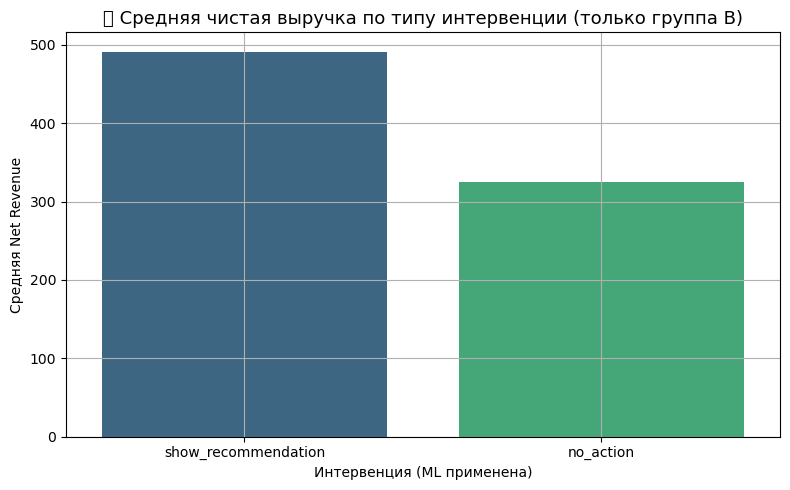

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(
    data=df_test[df_test['ab_group'] == 'B'],  # Только группа B
    x='intervention_improved',
    y='adjusted_net_revenue',
    estimator=np.mean,
    ci=None,
    palette='viridis'
)
plt.title("Средняя чистая выручка по типу интервенции (только группа B)", fontsize=13)
plt.xlabel("Интервенция (ML применена)")
plt.ylabel("Средняя Net Revenue")
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\Павел\AppData\Local\Temp\ipykernel_22864\71321579.py:17: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


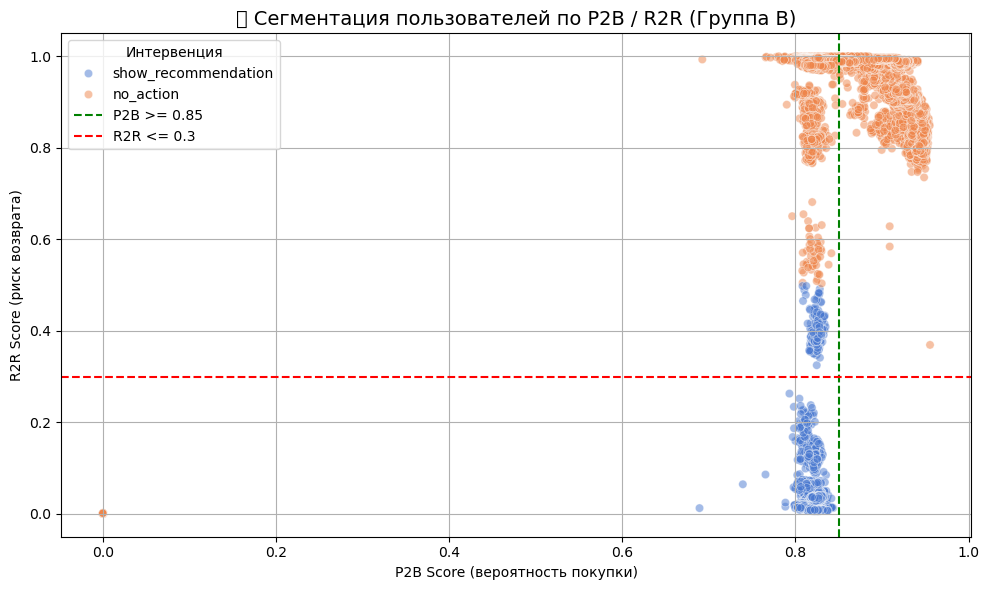

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_test[df_test['ab_group'] == 'B'],
    x='p2b_score',
    y='r2r_score',
    hue='intervention_improved',
    alpha=0.5,
    palette='muted'
)
plt.axvline(0.85, color='green', linestyle='--', label='P2B >= 0.85')
plt.axhline(0.3, color='red', linestyle='--', label='R2R <= 0.3')
plt.title("Сегментация пользователей по P2B / R2R (Группа B)", fontsize=14)
plt.xlabel("P2B Score (вероятность покупки)")
plt.ylabel("R2R Score (риск возврата)")
plt.legend(title='Интервенция')
plt.grid(True)
plt.tight_layout()
plt.show()